# 🧠 **Understanding ADHD**

### **👩🏻‍🔧 By Rosy**

## 🧐 **Understudied Brains' of Women**

**1. How does menopause affect women's brains?**

**2. Why are women more likely to develop Alzheimer's than men?**  

**3. Why does dementia manifest differently in women versus men?**

**4. The Alzheimer's drug Lepembi slows cognitive decline by 12% in women, compared to 43% in men.** 

## 🎯 **Goals & Tasks:**

**1. Provide insights by means of Data.**

**2. Understanding ADHD in women and children.**

**3. Advancing personalized medicine for neurodevelopmental disorders through an effective model.** 

## ⚖️ **Measurements (Feature Variables):**

#### 1. **Questionnaire:** **The Strength and Difficulties Questionnaire** | **Alabama Parenting Questionnaire**

#### 2. **Clinical Measurements**: **Edinburgh Handedness Inventory** | **Color Vision Test** 


## 💡 **Target Variables:**

1. **ADHD Diagnosis (ADHD_Outcome)** 
2. **Biological Sex (Sex_F)**  

##  🗂️  ***Import Libraries***  

In [1]:
import os

import pandas as pd
import numpy as np

import scipy.stats as stats 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp 
import missingno as msno 
sns.set() 

from scipy.stats import chi2_contingency

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


import warnings 
warnings.filterwarnings('ignore')  

In [2]:
os.listdir('/kaggle/input/adhd-train-data')   
os.listdir('/kaggle/input/adhd-solutions')  
os.listdir('/kaggle/input/functional-matrices')   

['TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv']

##  ⏳ ***Data Loading & Merging***  

In [3]:
df_quan = pd.read_excel('/kaggle/input/adhd-train-data/TRAIN_QUANTITATIVE .xlsx')   
df_cat = pd.read_excel('/kaggle/input/adhd-train-data/TRAIN_CATEGORICAL.xlsx') 
df_solu = pd.read_excel('/kaggle/input/adhd-solutions/TRAINING_SOLUTIONS.xlsx')

In [4]:
df = df_quan.merge(df_cat, on='participant_id', how='inner').merge(
                                                                    df_solu, 
                                                                    on='participant_id', 
                                                                    how='inner')

## 🔭 ***Data Exploration (EDA)***  

### 🔍 **1. Info & Dtype of Data**

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   EHQ_EHQ_Total                     1200 non-null   float64
 2   ColorVision_CV_Score              1190 non-null   float64
 3   APQ_P_APQ_P_CP                    1201 non-null   float64
 4   APQ_P_APQ_P_ID                    1201 non-null   float64
 5   APQ_P_APQ_P_INV                   1201 non-null   float64
 6   APQ_P_APQ_P_OPD                   1201 non-null   float64
 7   APQ_P_APQ_P_PM                    1201 non-null   float64
 8   APQ_P_APQ_P_PP                    1201 non-null   float64
 9   SDQ_SDQ_Conduct_Problems          1204 non-null   float64
 10  SDQ_SDQ_Difficulties_Total        1204 non-null   float64
 11  SDQ_SDQ_Emotional_Problems        1204 non-null   float64
 12  SDQ_SD

### 🔍 **2.Take a Glimpse of Data**

In [6]:
df.head(5).T   

,0,1,2,3,4
participant_id,00aIpNTbG5uh,00fV0OyyoLfw,04X1eiS79T4B,05ocQutkURd6,06YUNBA9ZRLq
EHQ_EHQ_Total,100.0,92.27,86.67,93.34,0.0
ColorVision_CV_Score,13.0,14.0,14.0,14.0,14.0
APQ_P_APQ_P_CP,3.0,3.0,3.0,3.0,8.0
APQ_P_APQ_P_ID,15.0,12.0,21.0,11.0,12.0
APQ_P_APQ_P_INV,44.0,35.0,37.0,42.0,35.0
APQ_P_APQ_P_OPD,14.0,25.0,18.0,15.0,22.0
APQ_P_APQ_P_PM,20.0,28.0,26.0,20.0,12.0
APQ_P_APQ_P_PP,27.0,30.0,28.0,28.0,24.0
SDQ_SDQ_Conduct_Problems,3.0,5.0,3.0,0.0,6.0


### 🔍 **3. Descriptive Statistics**

In [7]:
df.describe().T  

,count,mean,std,min,25%,50%,75%,max
EHQ_EHQ_Total,1200.0,59.514750,49.744631,-100.0,46.670000,77.800000,94.470000,100.000000
ColorVision_CV_Score,1190.0,13.419328,2.112830,0.0,14.000000,14.000000,14.000000,14.000000
APQ_P_APQ_P_CP,1201.0,3.819317,1.330348,2.0,3.000000,3.000000,4.000000,12.000000
APQ_P_APQ_P_ID,1201.0,13.337219,3.593562,5.0,11.000000,13.000000,16.000000,28.000000
APQ_P_APQ_P_INV,1201.0,39.767694,4.872729,23.0,36.000000,40.000000,43.000000,50.000000
APQ_P_APQ_P_OPD,1201.0,17.963364,3.333965,7.0,16.000000,18.000000,20.000000,28.000000
APQ_P_APQ_P_PM,1201.0,16.557036,5.146548,5.0,13.000000,16.000000,19.000000,37.000000
APQ_P_APQ_P_PP,1201.0,25.498751,3.053720,13.0,23.000000,26.000000,28.000000,30.000000
SDQ_SDQ_Conduct_Problems,1204.0,2.074751,2.022992,0.0,0.000000,2.000000,3.000000,10.000000
SDQ_SDQ_Difficulties_Total,1204.0,12.213455,6.517330,0.0,7.000000,12.000000,17.000000,34.000000


### 🔍 **4. Dimensions of DataFrame**

In [8]:
print(f'Rows: {df.shape[0]}') 
print(f'Colums: {df.shape[1]}')     

Rows: 1213
Colums: 30


### 🔍 **5. Check Duplicated & Missing Values** 

In [9]:
print(f'Duplicated: {df.duplicated().sum()}') 

Duplicated: 0


In [10]:
missing_counts = df.isnull().sum() 
missing_df = pd.DataFrame({'No. of Missing Values' : missing_counts[missing_counts>0].sort_values(ascending=False), 
                           '% of Missing Values': (missing_counts[missing_counts>0] / len(df) * 100).sort_values(ascending=False) 
                          })

missing_df.style.background_gradient('magma')   

,No. of Missing Values,% of Missing Values
MRI_Track_Age_at_Scan,360,29.678483
Barratt_Barratt_P2_Occ,222,18.301731
Barratt_Barratt_P2_Edu,198,16.323166
PreInt_Demos_Fam_Child_Race,54,4.451772
PreInt_Demos_Fam_Child_Ethnicity,43,3.544930
Barratt_Barratt_P1_Occ,31,2.555647
ColorVision_CV_Score,23,1.896125
Barratt_Barratt_P1_Edu,15,1.236603
EHQ_EHQ_Total,13,1.071723
APQ_P_APQ_P_PP,12,0.989283


### 🔍 **6. Looking for Correlations**

In [11]:
df.drop('participant_id', axis=1, inplace=True)   

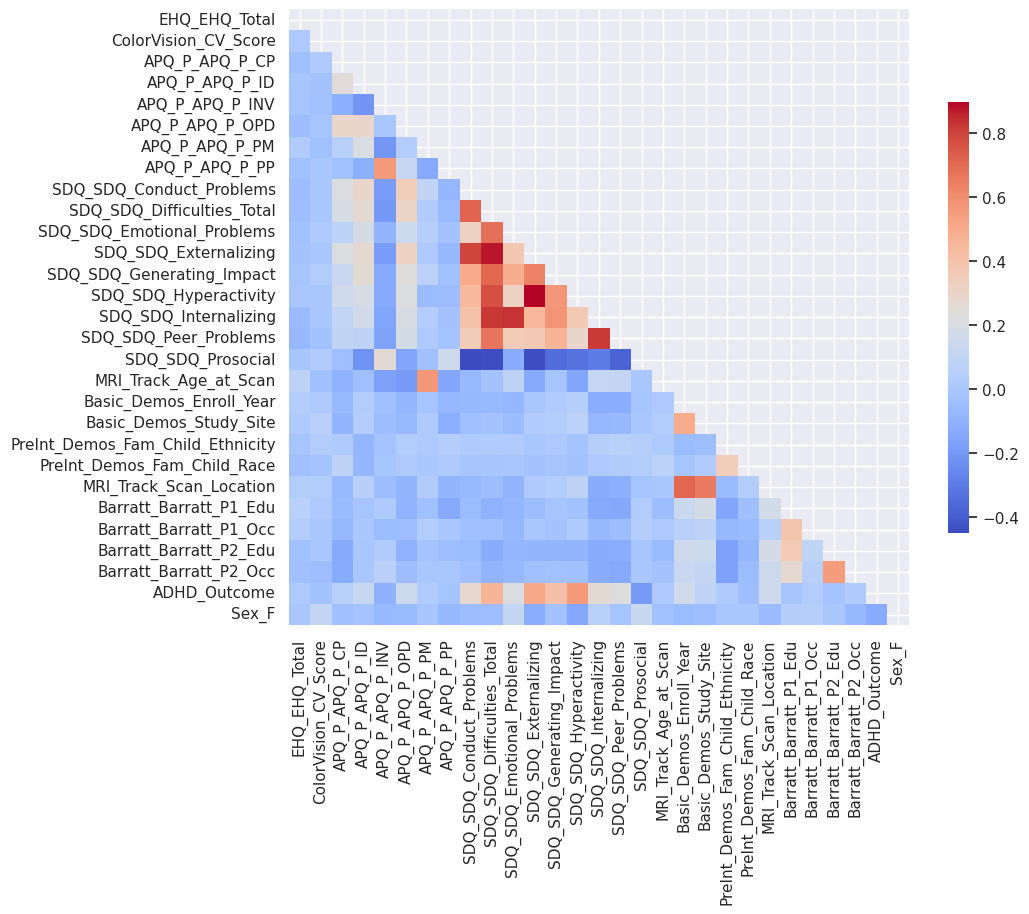

In [12]:
corr_matrix = df.corr() 
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  
fig = plt.figure(figsize=(10, 8))  

sns.heatmap(corr_matrix, 
           mask=mask,
           cmap='coolwarm', 
           cbar_kws={'shrink' : .7})   

plt.show() 

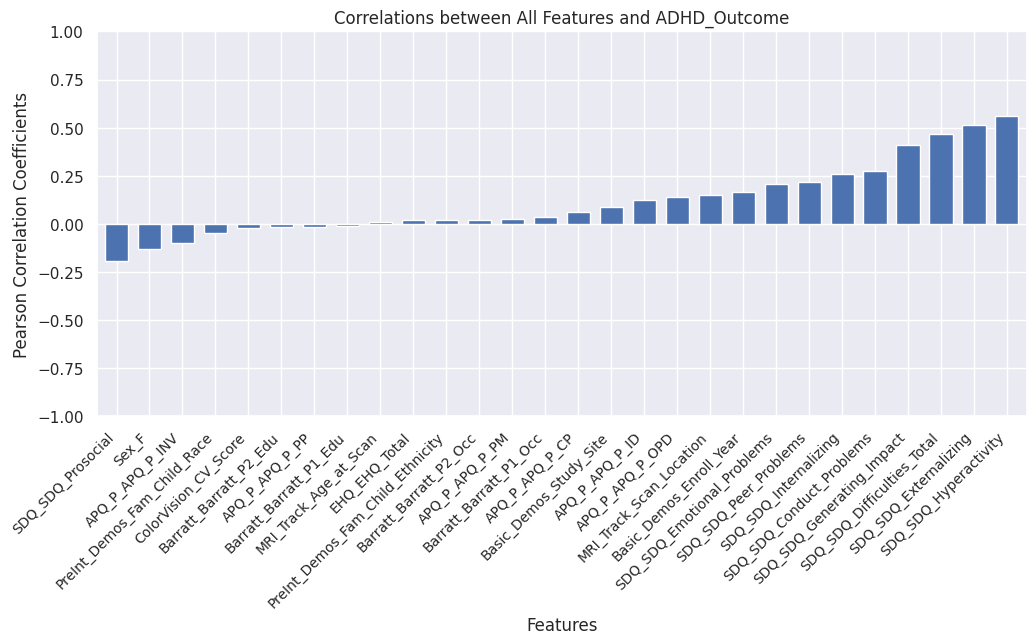

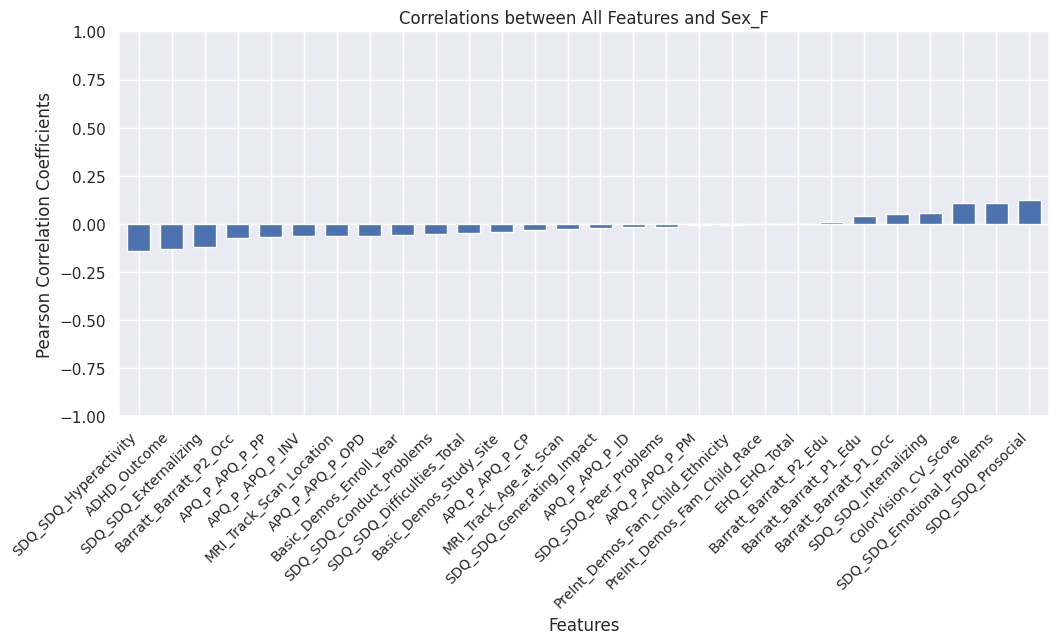

In [13]:
target_cols = ['ADHD_Outcome', 'Sex_F'] 

for col in target_cols:
    correlations = corr_matrix[col].drop([col]).sort_values()  
    fig = plt.figure(figsize=(12,5)) 
    ax = correlations.plot(kind='bar', width=0.7) 


    ax.set(ylim = [-1,1], 
           ylabel='Pearson Correlation Coefficients',
           xlabel= 'Features') 
    
    ax.set_xticklabels(correlations.index,  
                       rotation=45,
                       ha='right',
                       fontsize=10)  
    
    ax.set_title(f'Correlations between All Features and {col}')   

    plt.show()  

##  🔨***Data Cleaning & Preprocessing***  

### 🔍 **1. Visualization Distribution & Correlation of Missing Values**

<Axes: >

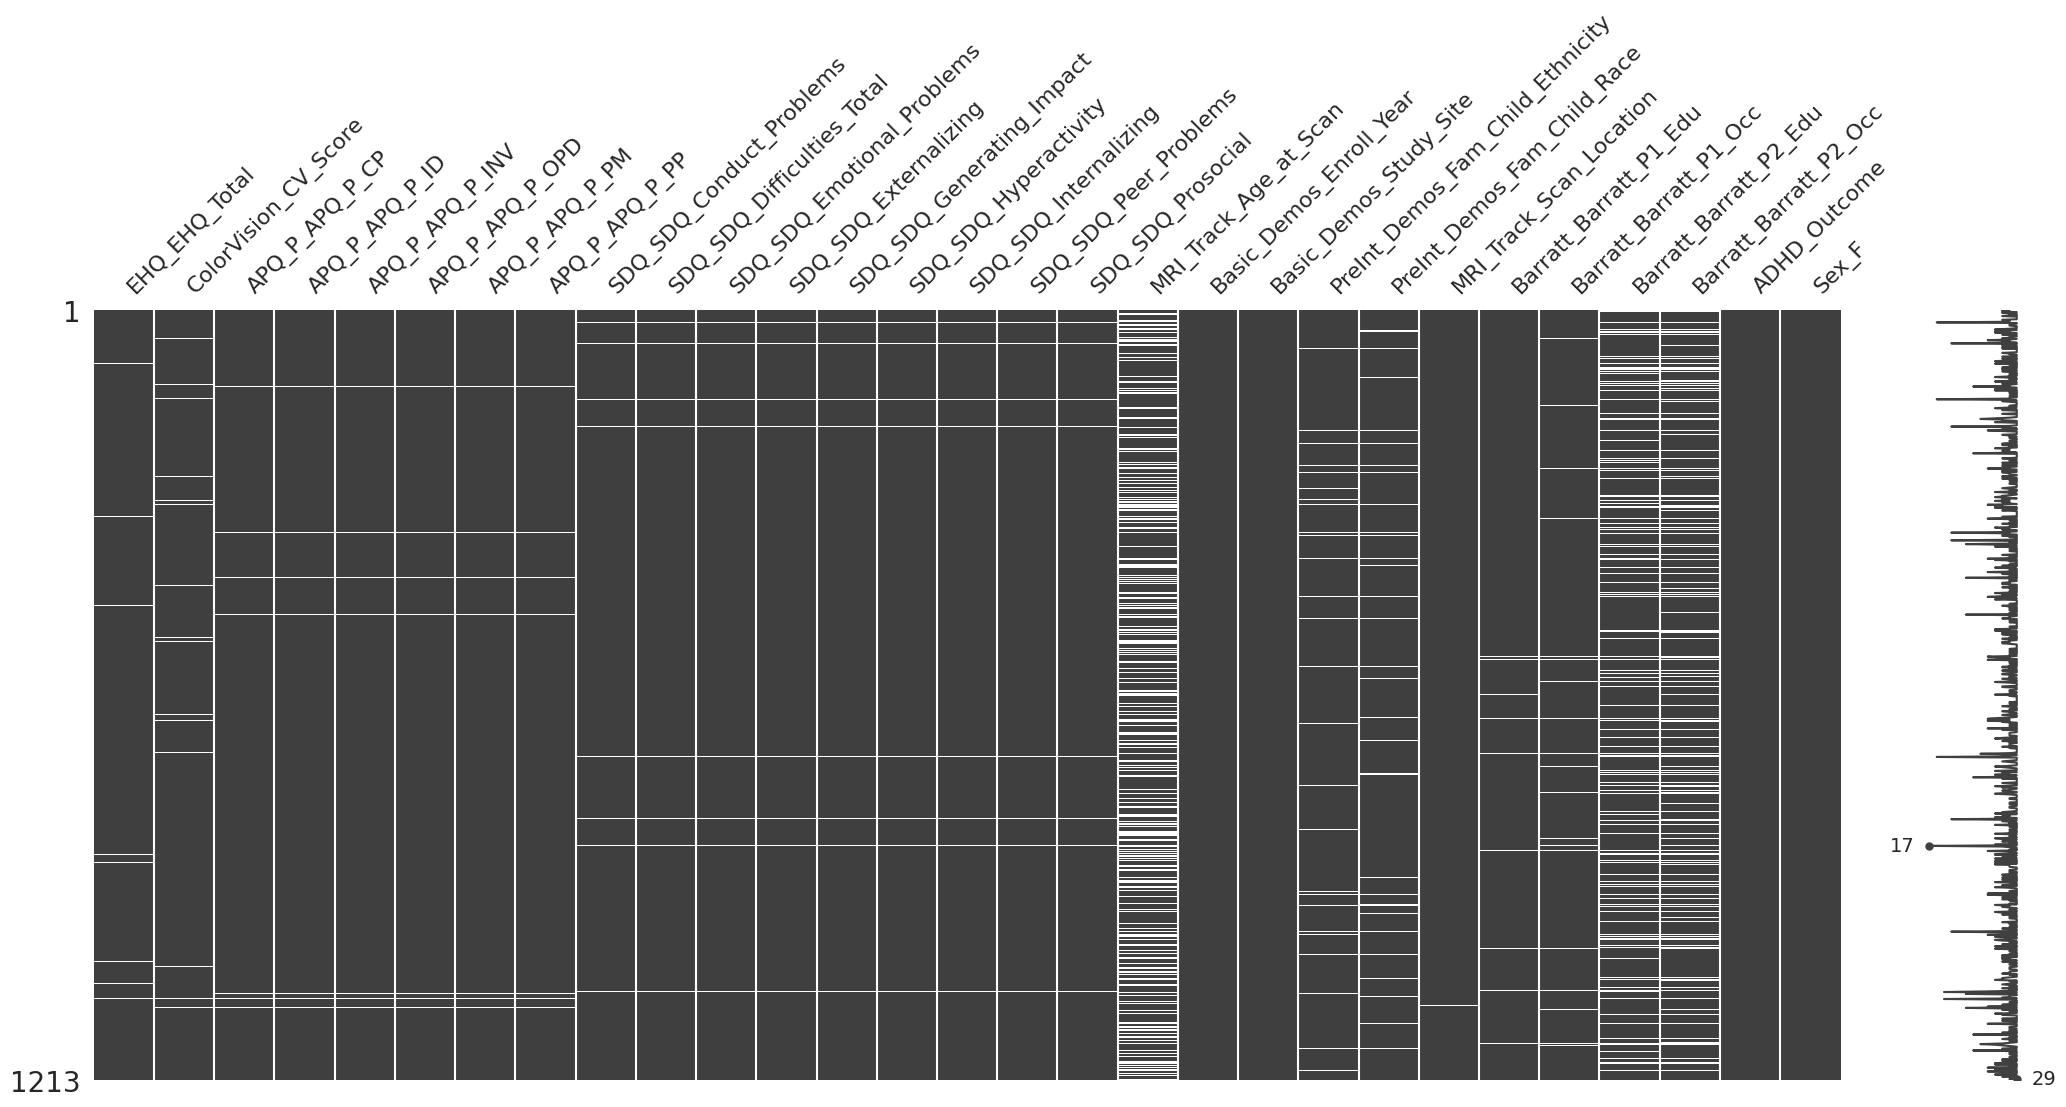

In [14]:
msno.matrix(df)   

### 📝 **Summary:** 

#### **1. MCAR (Missing Completely at Random)** 
**The missing values in the following columns are completely random:** 

    MRI_Track_Age_at_Scan 
    EHQ_EHQ_Total 
    ColorVision_CV_Score 

#### **2. MAR (Missing at Random)** 
**The absence depends on observed data:**
* **APQ & SDQ Columns: The missing values in one subscale depend on other subscales.** 
* **PreInt_Demos_Fam_Child_Ethnicity: Missingness depends on PreInt_Demos_Fam_Child_Race.**
* **Barratt_Barratt_P1_Edu: Missingness depends on Barratt_Barratt_P1_Occ (the same applies to P2).** 

<Axes: >

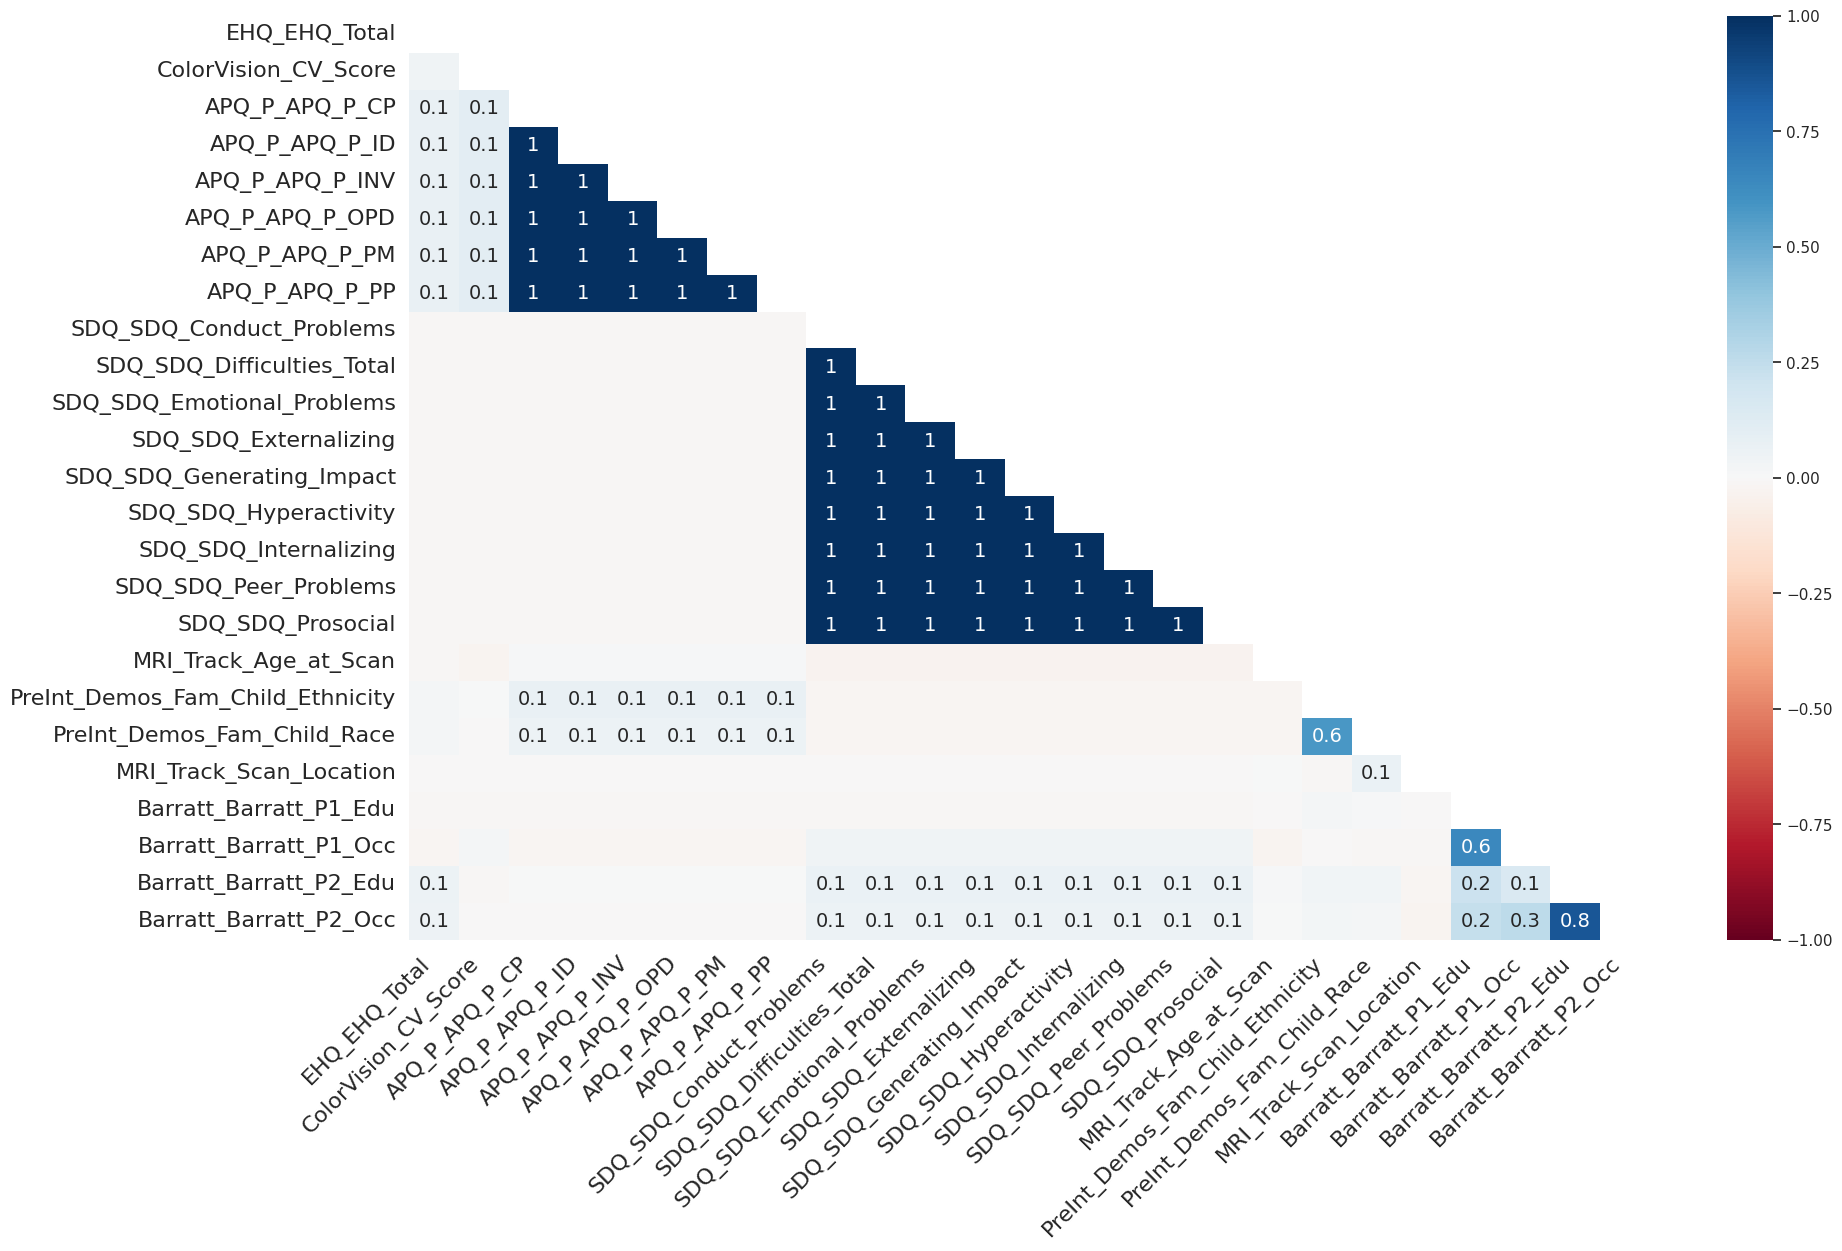

In [15]:
msno.heatmap(df) 

### 📝 Summary: 

* ...
* ...

### 🔍 **2. Deal with MCAR**

* **The variables MRI_Track_Age_at_Scan, EHQ_EHQ_Total, and ColorVision_CV_Score exhibited completely random missingness, with missing percentages of 29.678%, 1.072%, and 1.896%, respectively.**

*  **Given the high missing rate(29.678%) in MRI_Track_Age_at_Scan: Imputation using Global Median**

    **Reason 1: Local Median imputation may overfit small subgroups(which may amplify noise), especially when missing data is highly clustered.**

   **Reason 2: With 29.678% missing data, subgroups may have insufficient samples for reliable median calculation. (The Global Median can reduce variance in imputation.)**

   **Reason 3: The low standard deviation(3.234) indicates tightly clustered data around the median, suggesting that the Global Median is a robust central tendency measure.** 


In [16]:
fill_median_cols = ['MRI_Track_Age_at_Scan', 'EHQ_EHQ_Total', 'ColorVision_CV_Score'] 

def fill_na_with_median(df,cols):
    for col in fill_median_cols:
        df[col].fillna(df[col].median(), inplace=True)   
    return df 

fill_na_with_median(df, fill_median_cols) 

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,...,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,ADHD_Outcome,Sex_F
0,100.00,13.0,3.0,15.0,44.0,14.0,20.0,27.0,3.0,17.0,...,4,1.0,0.0,3.0,21.0,45.0,NaN,NaN,1,0
1,92.27,14.0,3.0,12.0,35.0,25.0,28.0,30.0,5.0,20.0,...,1,0.0,9.0,2.0,21.0,0.0,21.0,45.0,1,0
2,86.67,14.0,3.0,21.0,37.0,18.0,26.0,28.0,3.0,24.0,...,1,1.0,2.0,2.0,9.0,0.0,NaN,NaN,0,1
3,93.34,14.0,3.0,11.0,42.0,15.0,20.0,28.0,0.0,5.0,...,1,3.0,8.0,2.0,18.0,10.0,18.0,0.0,0,1
4,0.00,14.0,8.0,12.0,35.0,22.0,12.0,24.0,6.0,23.0,...,1,0.0,1.0,2.0,12.0,0.0,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,100.00,14.0,3.0,14.0,36.0,18.0,13.0,22.0,5.0,20.0,...,4,1.0,1.0,3.0,12.0,NaN,15.0,5.0,0,1
1209,46.67,14.0,3.0,18.0,42.0,21.0,15.0,25.0,2.0,5.0,...,1,0.0,0.0,3.0,21.0,40.0,21.0,40.0,1,0
1210,-40.00,14.0,3.0,19.0,34.0,20.0,20.0,25.0,2.0,14.0,...,3,2.0,3.0,3.0,21.0,40.0,21.0,35.0,1,1
1211,100.00,14.0,3.0,9.0,45.0,23.0,11.0,30.0,1.0,10.0,...,4,0.0,1.0,3.0,18.0,35.0,18.0,45.0,1,0


### 🔍 **3. Deal with Missing Values in SDQ & APQ**

* **They are all quantitative variables but in essence are ordinal categorical(Likert_Scale).**
  * ** 
* **All columns of APQ have 12 missing values, accounting of 0.989% of whole dataframe respectively, and 9 missing values in all columns in SDQ with percentage of 0.742% respectively.**

  * **
* **In Summary: Ordinal Categorical + Percentage of Missing Values is very small --> Mode Imputation.**
  
  * **
* **The columns in SDQ and APQ have correlations with target variables (from heatmap) --> fill in Local mode imputation with group by 'ADHD_Outcome' and 'Sex_F'.**  

In [17]:
target_cols = ['ADHD_Outcome', 'Sex_F'] 

def fill_in_na_mode(df,cols):
    for col in cols:
        df[col] = df.groupby(target_cols)[col].transform(lambda x: x.fillna(x.mode()[0]))
    return df 

sdq_cols = [col for col in df.columns if col.startswith('SDQ')] 
apq_cols= [col for col in df.columns if col.startswith('APQ')]   

fill_in_na_mode(df, sdq_cols) 
fill_in_na_mode(df, apq_cols)       

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,...,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,ADHD_Outcome,Sex_F
0,100.00,13.0,3.0,15.0,44.0,14.0,20.0,27.0,3.0,17.0,...,4,1.0,0.0,3.0,21.0,45.0,NaN,NaN,1,0
1,92.27,14.0,3.0,12.0,35.0,25.0,28.0,30.0,5.0,20.0,...,1,0.0,9.0,2.0,21.0,0.0,21.0,45.0,1,0
2,86.67,14.0,3.0,21.0,37.0,18.0,26.0,28.0,3.0,24.0,...,1,1.0,2.0,2.0,9.0,0.0,NaN,NaN,0,1
3,93.34,14.0,3.0,11.0,42.0,15.0,20.0,28.0,0.0,5.0,...,1,3.0,8.0,2.0,18.0,10.0,18.0,0.0,0,1
4,0.00,14.0,8.0,12.0,35.0,22.0,12.0,24.0,6.0,23.0,...,1,0.0,1.0,2.0,12.0,0.0,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,100.00,14.0,3.0,14.0,36.0,18.0,13.0,22.0,5.0,20.0,...,4,1.0,1.0,3.0,12.0,NaN,15.0,5.0,0,1
1209,46.67,14.0,3.0,18.0,42.0,21.0,15.0,25.0,2.0,5.0,...,1,0.0,0.0,3.0,21.0,40.0,21.0,40.0,1,0
1210,-40.00,14.0,3.0,19.0,34.0,20.0,20.0,25.0,2.0,14.0,...,3,2.0,3.0,3.0,21.0,40.0,21.0,35.0,1,1
1211,100.00,14.0,3.0,9.0,45.0,23.0,11.0,30.0,1.0,10.0,...,4,0.0,1.0,3.0,18.0,35.0,18.0,45.0,1,0


### 🔍 **4. Handling Categorical Attributes** 

In [18]:
missing_counts = df.isnull().sum() 

missing_values = pd.DataFrame({'No. of Missing Values(Cat)': missing_counts[missing_counts>0].sort_values(ascending=False),
                               '% of Missing Values(Cat)': (missing_counts[missing_counts>0] / len(df)*100).sort_values(ascending=False)}) 

missing_values.style.background_gradient('magma')

,No. of Missing Values(Cat),% of Missing Values(Cat)
Barratt_Barratt_P2_Occ,222,18.301731
Barratt_Barratt_P2_Edu,198,16.323166
PreInt_Demos_Fam_Child_Race,54,4.451772
PreInt_Demos_Fam_Child_Ethnicity,43,3.544930
Barratt_Barratt_P1_Occ,31,2.555647
Barratt_Barratt_P1_Edu,15,1.236603
MRI_Track_Scan_Location,3,0.247321


<Axes: >

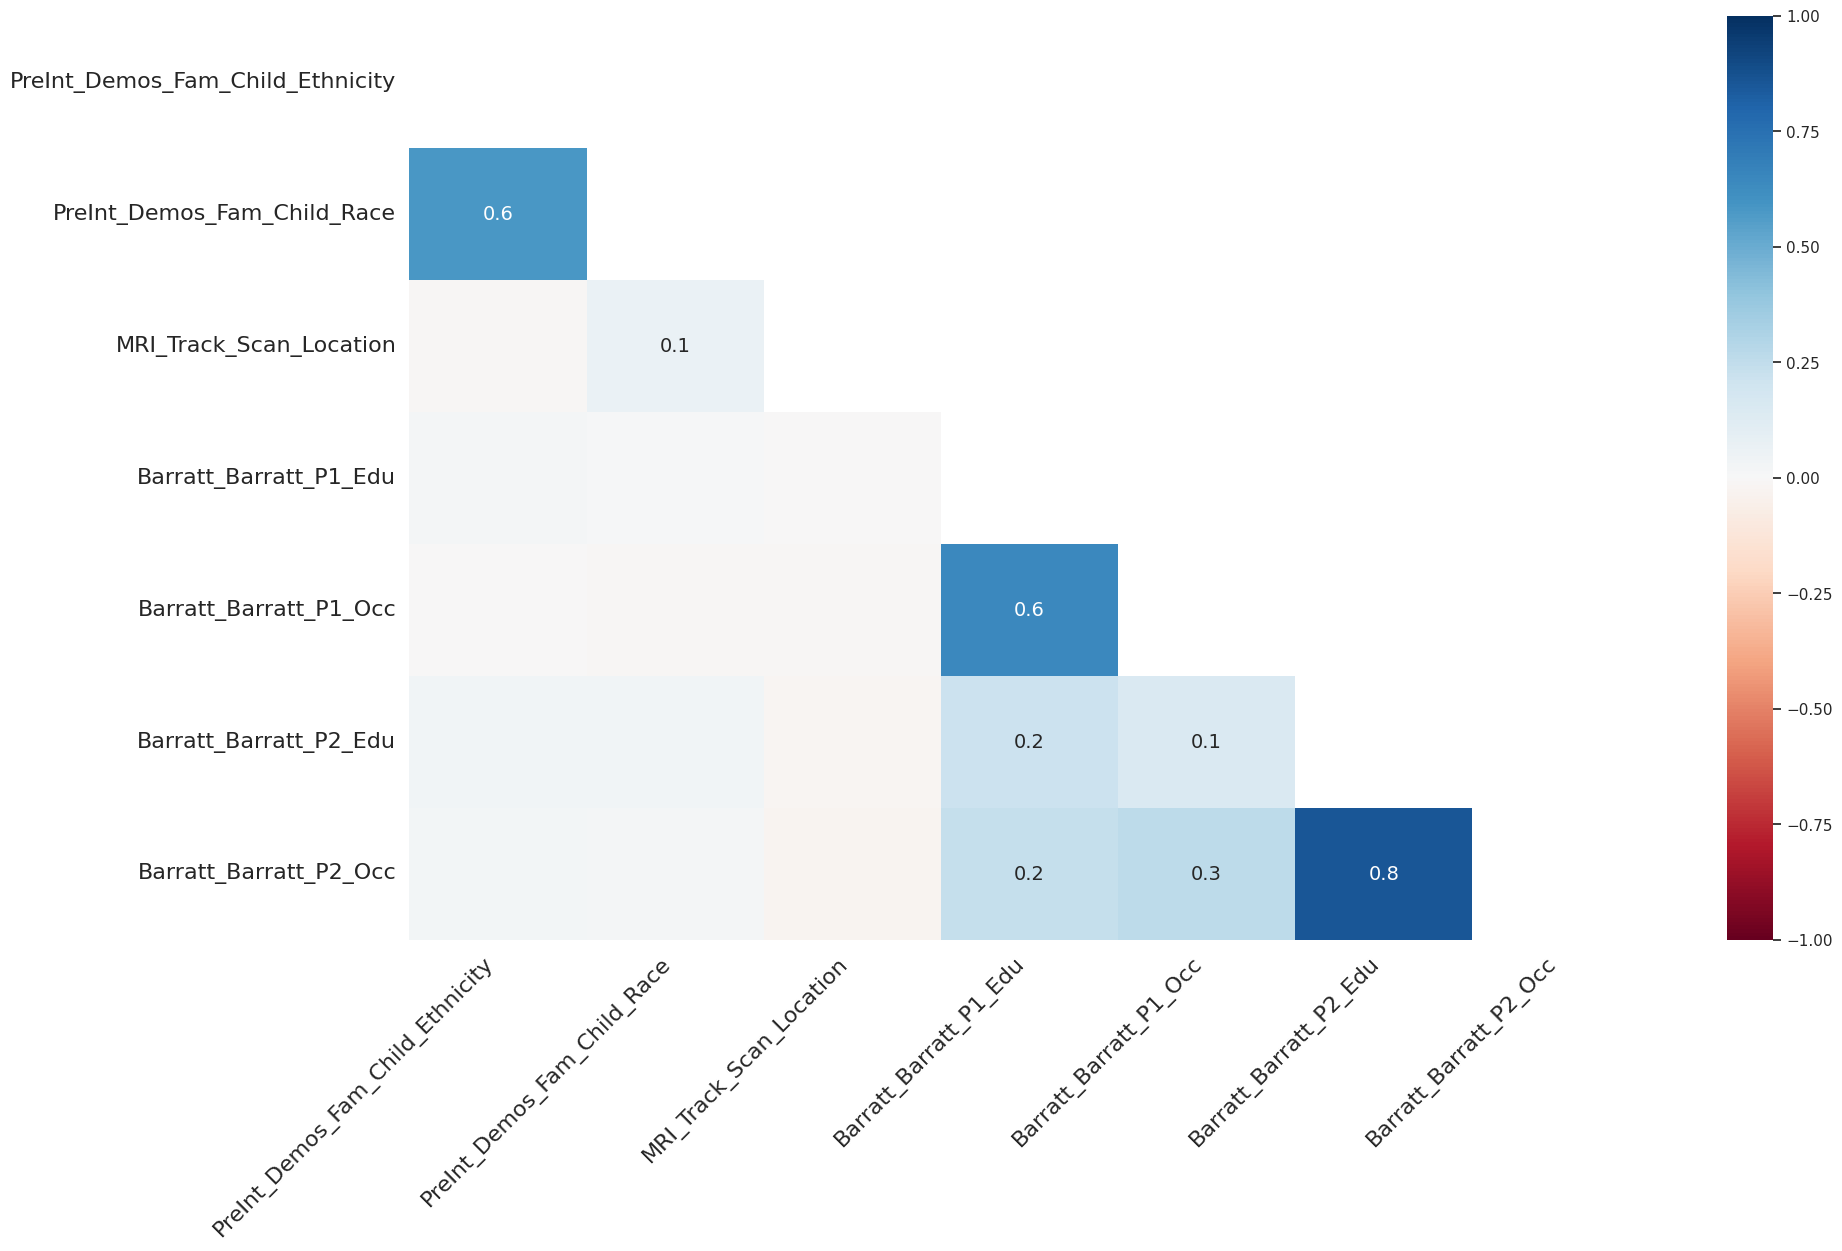

In [19]:
msno.heatmap(df)

### **Barratt Simplified Measure of Social Status**


   #### 1. The values are ordinal categorical but are represented numerically.

   #### 2. **Missing Value Statistics**

   * P2:
       * Barratt_Barratt_P2_Occ: 222 missing (18.30%)
       * Barratt_Barratt_P2_Edu: 198 missing (16.32%)
       * The missing values in **Barratt_Barratt_P2_Occ** and **Barratt_Barratt_P2_Edu** have a strong correlation(0.8)
   * P1:
       * Barratt_Barratt_P1_Occ:  31 missing (2.55%)
       * Barratt_Barratt_P1_Edu:  15 missing (1.24%)
       * The missing values in **Barratt_Barratt_P1_Occ** and **Barratt_Barratt_P1_Edu** have a moderate correlation(0.6).

   #### 3. **Strategy for Handling Missing Values**
   * Create two new indicator columns:
     * One to flag if both P2_Occ and P2_Edu are missing (possibly indicating a single-parent family). 
     * Another to flag if both P1_Occ and P1_Edu are missing.
   * Predictive Imputation:
     * If only one of the two correlated values is missing (e.g., P2_Occ is missing but P2_Edu is available), use the non-missing value to predict the missing one (using a regression model).

In [20]:
from sklearn.ensemble import RandomForestClassifier    

def fill_missing_bidirectional(data, col1, col2):
    df_copy = data.copy()   
    missing_col1 = df_copy[col1].isna() & ~df_copy[col2].isna() 
    missing_col2 = df_copy[col2].isna() & ~df_copy[col1].isna()  

    if missing_col1.any(): 
        known_data = df_copy.dropna(subset=[col1, col2]) 
        X = known_data[[col2]].values
        y = known_data[col1].values  
        model = RandomForestClassifier(random_state=42)  
        model.fit(X,y) 
        df_copy.loc[missing_col1, col1] = model.predict(df_copy.loc[missing_col1, [col2]]) 


    if missing_col2.any(): 
        known_data = df_copy.dropna(subset=[col1,col2]) 
        X = known_data[[col1]].values
        y = known_data[col2].values
        model = RandomForestClassifier(random_state=42) 
        model.fit(X, y) 
        df_copy.loc[missing_col2, col2] = model.predict(df_copy.loc[missing_col2, [col1]]) 
        
    return df_copy



df = fill_missing_bidirectional(data = df,  
                                col1 = 'Barratt_Barratt_P2_Occ', 
                                col2 = 'Barratt_Barratt_P2_Edu') 

df = fill_missing_bidirectional(data = df, 
                                col1= 'Barratt_Barratt_P1_Occ', 
                                col2= 'Barratt_Barratt_P1_Edu')   

In [21]:
df['P2_All_Missing'] = (df['Barratt_Barratt_P2_Occ'].isna() 
                         & df['Barratt_Barratt_P2_Edu'].isna()).astype(int) 
df['P1_All_Missing'] = (df['Barratt_Barratt_P1_Occ'].isna() 
                         & df['Barratt_Barratt_P1_Edu'].isna()).astype(int)    

### 🏫 **MRI_Track_Scan_Location**

In [22]:
loca_mode = df['MRI_Track_Scan_Location'].mode()[0] 
df['MRI_Track_Scan_Location'].fillna(loca_mode, inplace=True)      

###  🧕🏾 **Ethnicity & Race**

In [23]:
df['PreInt_Demos_Fam_Child_Ethnicity'].fillna(df['PreInt_Demos_Fam_Child_Ethnicity'].mode()[0], 
                                             inplace=True)   
df['PreInt_Demos_Fam_Child_Race'].fillna(df['PreInt_Demos_Fam_Child_Race'].mode()[0], 
                                             inplace=True)    

In [24]:
df.isnull().sum() 

EHQ_EHQ_Total                         0
ColorVision_CV_Score                  0
APQ_P_APQ_P_CP                        0
APQ_P_APQ_P_ID                        0
APQ_P_APQ_P_INV                       0
APQ_P_APQ_P_OPD                       0
APQ_P_APQ_P_PM                        0
APQ_P_APQ_P_PP                        0
SDQ_SDQ_Conduct_Problems              0
SDQ_SDQ_Difficulties_Total            0
SDQ_SDQ_Emotional_Problems            0
SDQ_SDQ_Externalizing                 0
SDQ_SDQ_Generating_Impact             0
SDQ_SDQ_Hyperactivity                 0
SDQ_SDQ_Internalizing                 0
SDQ_SDQ_Peer_Problems                 0
SDQ_SDQ_Prosocial                     0
MRI_Track_Age_at_Scan                 0
Basic_Demos_Enroll_Year               0
Basic_Demos_Study_Site                0
PreInt_Demos_Fam_Child_Ethnicity      0
PreInt_Demos_Fam_Child_Race           0
MRI_Track_Scan_Location               0
Barratt_Barratt_P1_Edu               14
Barratt_Barratt_P1_Occ               14


In [25]:
fig = px.scatter_matrix(data_frame=df, 
                        dimensions= ['ColorVision_CV_Score', 'ADHD_Outcome']) 

fig.update_traces(diagonal_visible=False) 
fig.show() 

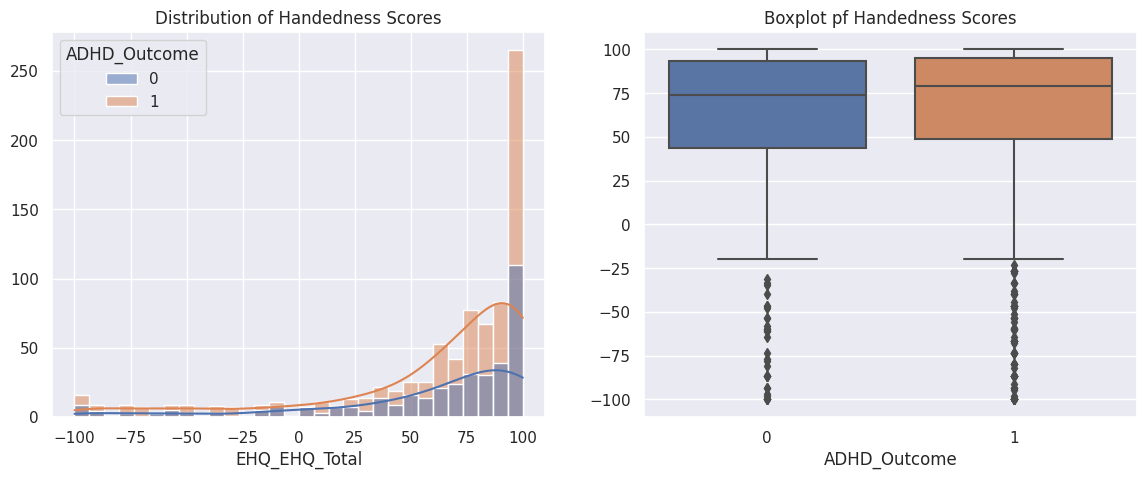

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, 
                               figsize=(14, 5)) 

sns.histplot(data = df,
             x = 'EHQ_EHQ_Total', 
             bins=30,
             kde=True,
             hue='ADHD_Outcome', 
             ax = ax1) 

ax1.set_title('Distribution of Handedness Scores') 
ax1.set_ylabel('')


sns.boxplot(data=df,
            x='ADHD_Outcome', 
            y='EHQ_EHQ_Total',
            ax=ax2)   

ax2.set_title('Boxplot pf Handedness Scores') 
ax2.set_ylabel('')


plt.show() 

# 🎥   ***Data Visualization***    

### **1️⃣ Distribution of ADHD**   

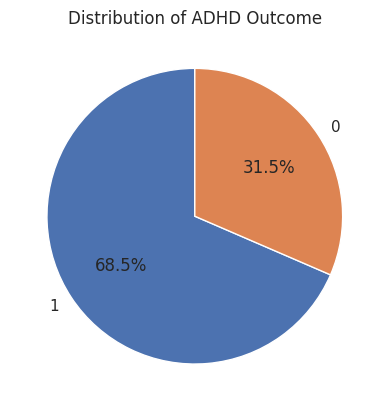

In [27]:
df['ADHD_Outcome'].value_counts().plot(kind='pie',
                                       autopct='%1.1f%%',
                                       startangle=90)  

plt.ylabel('')
plt.title('Distribution of ADHD Outcome') 
plt.show() 

 ####  2️⃣ ***SDQ(mean) by ADHD Outcome***  

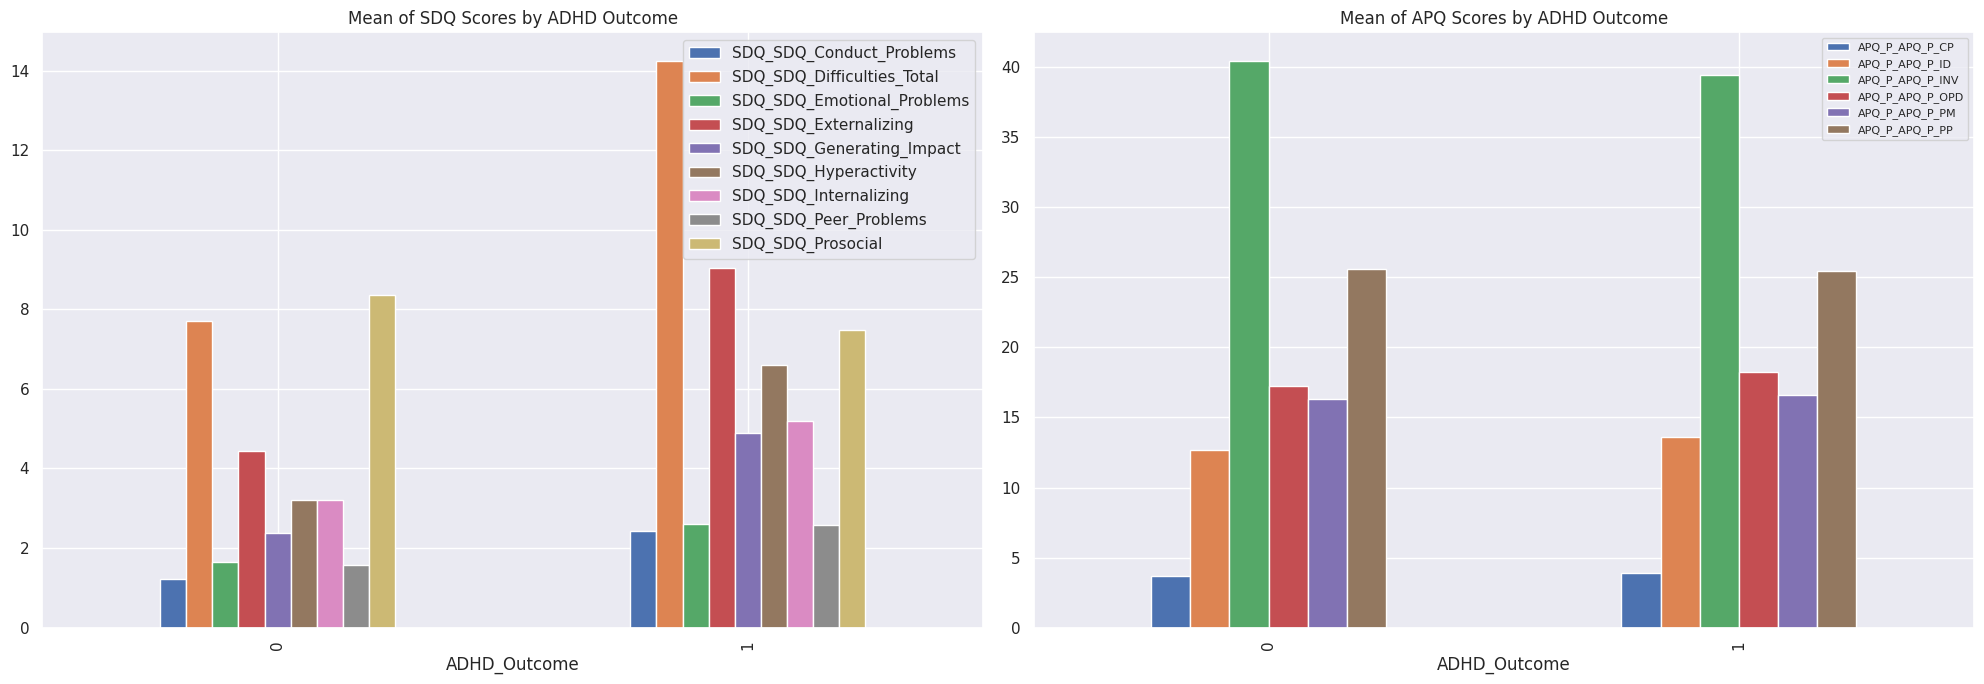

In [28]:
SDQ_cols = [col for col in df.columns if col.startswith('SDQ')]
APQ_cols = [col for col in df.columns if col.startswith('APQ')] 


fig, (ax1, ax2) = plt.subplots(1,2,
                              figsize=(20,7)) 

df.groupby('ADHD_Outcome')[SDQ_cols].mean().plot(kind='bar',
                                                 ax =ax1,
                                                 title='Mean of SDQ Scores by ADHD Outcome')


df.groupby('ADHD_Outcome')[APQ_cols].mean().plot(kind='bar',
                                                 ax =ax2,
                                                 title='Mean of APQ Scores by ADHD Outcome') 


plt.tight_layout() 
plt.legend(fontsize=8)
plt.show() 

 ####  3️⃣ ***Countplot of SDQ by ADHD Outcome + Boxplot by Outcome & Sex***  

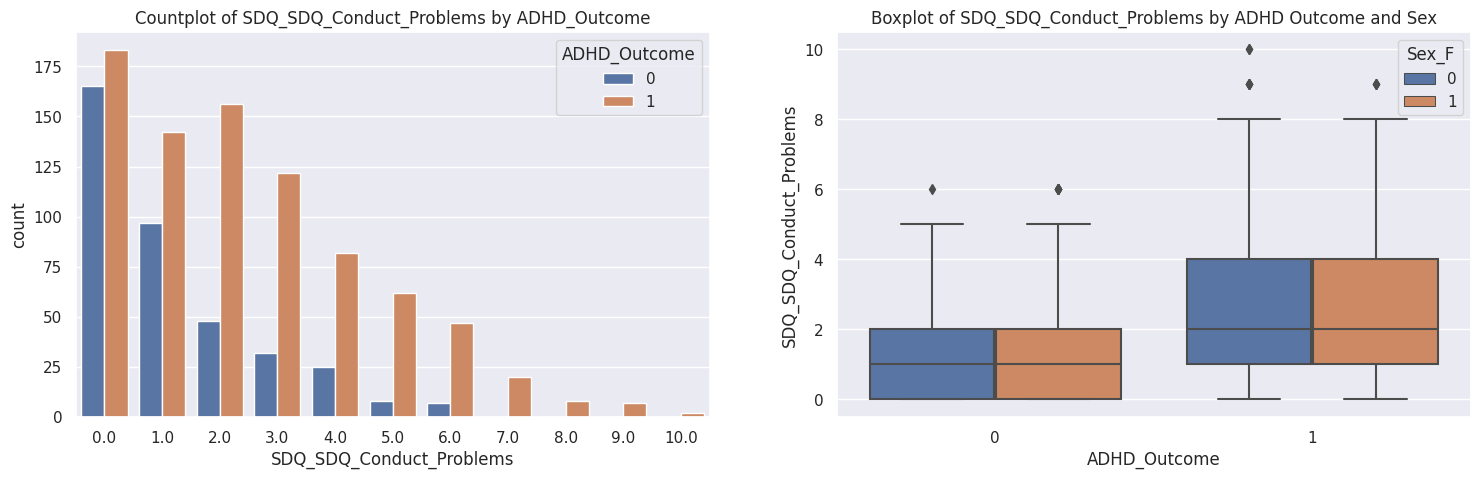

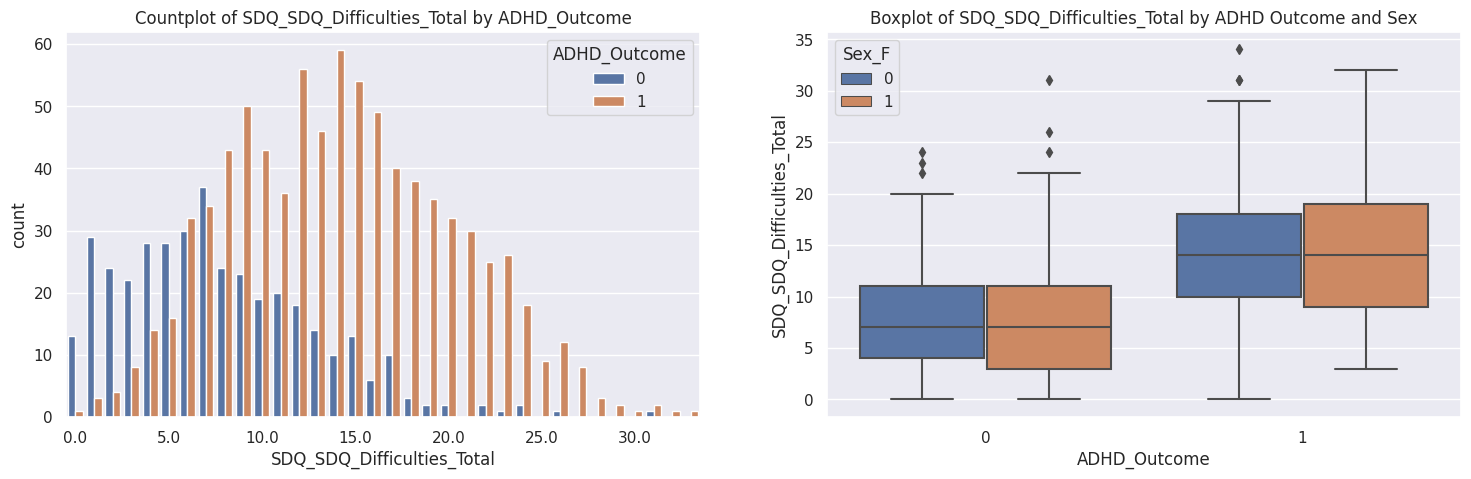

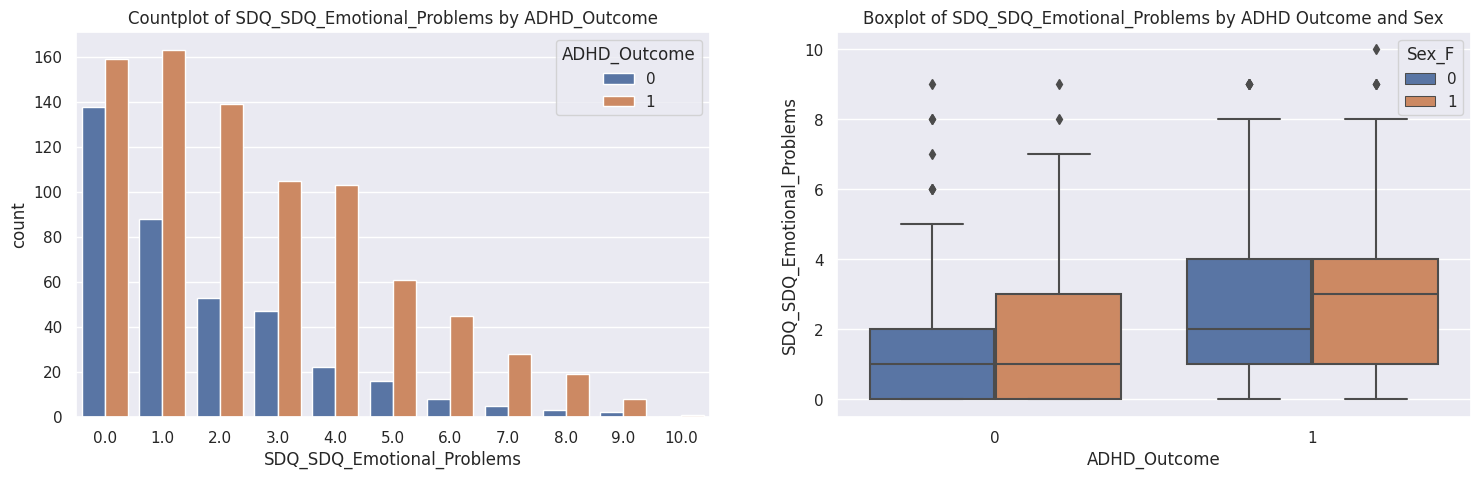

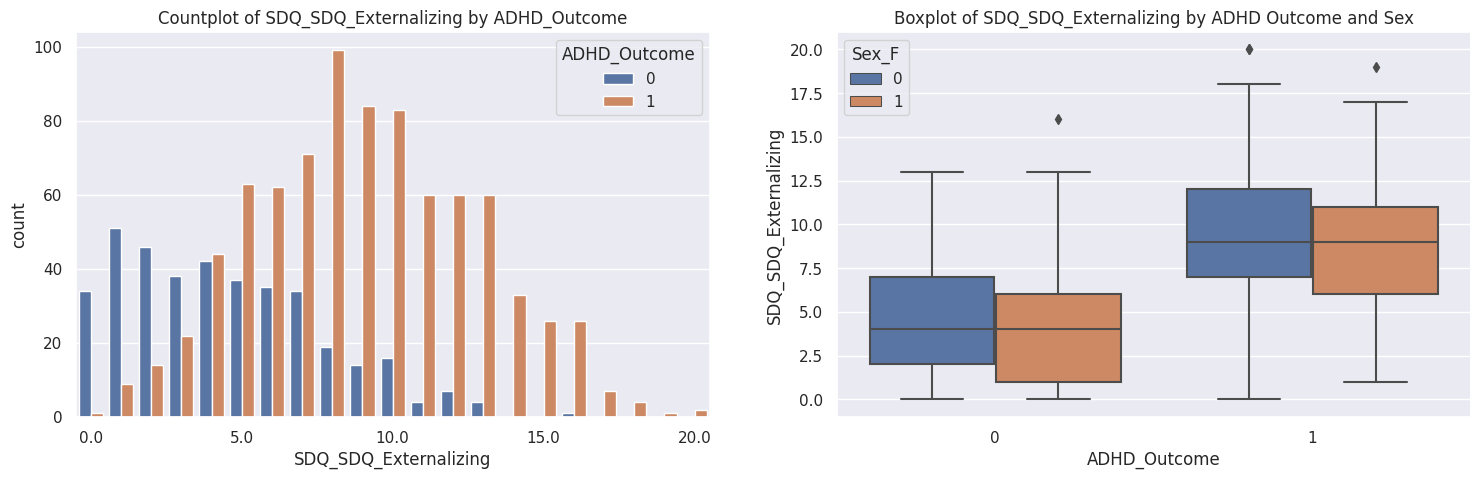

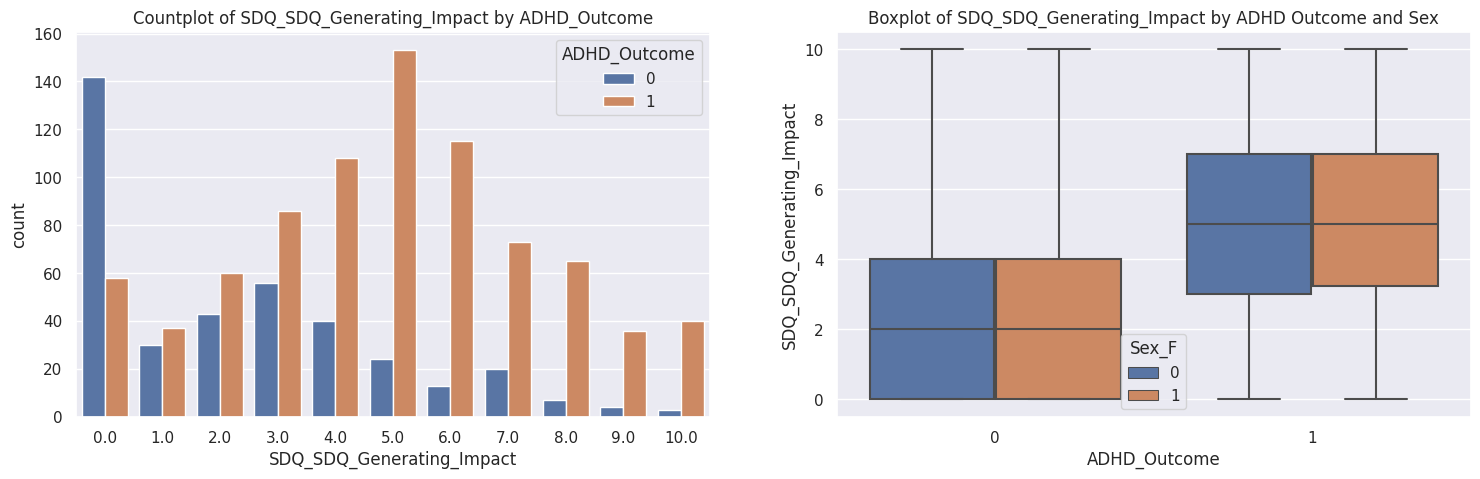

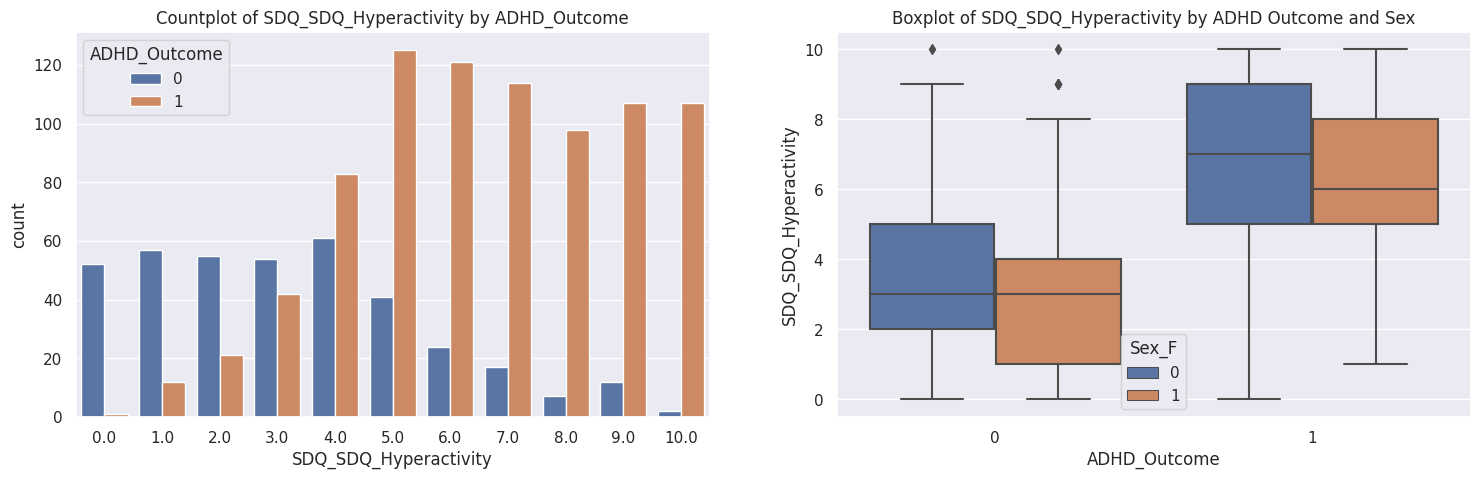

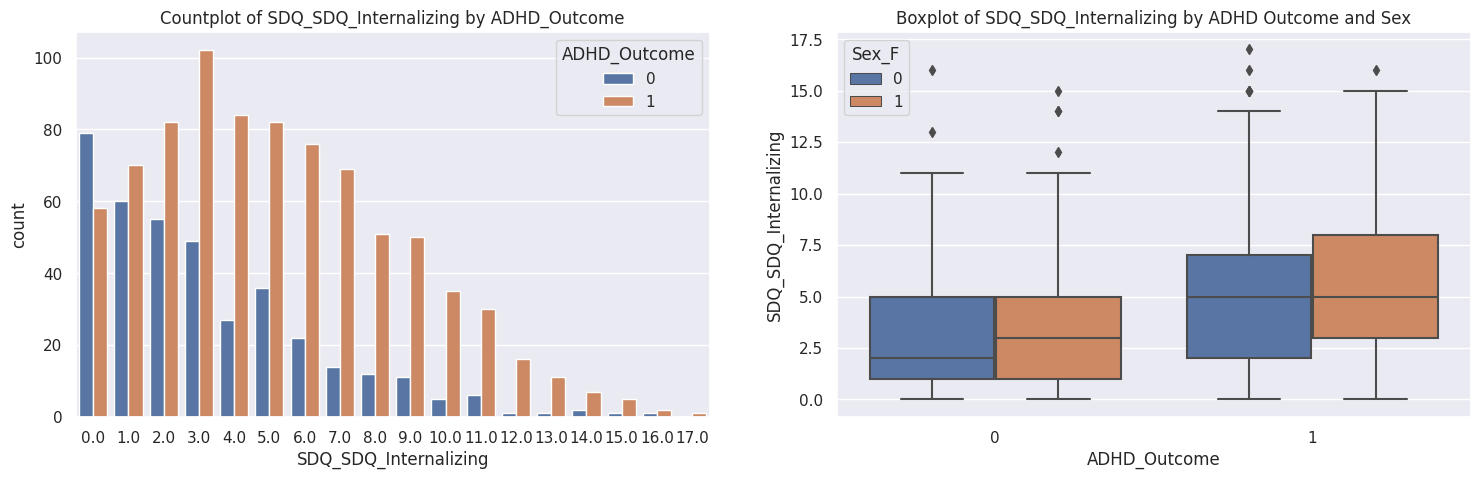

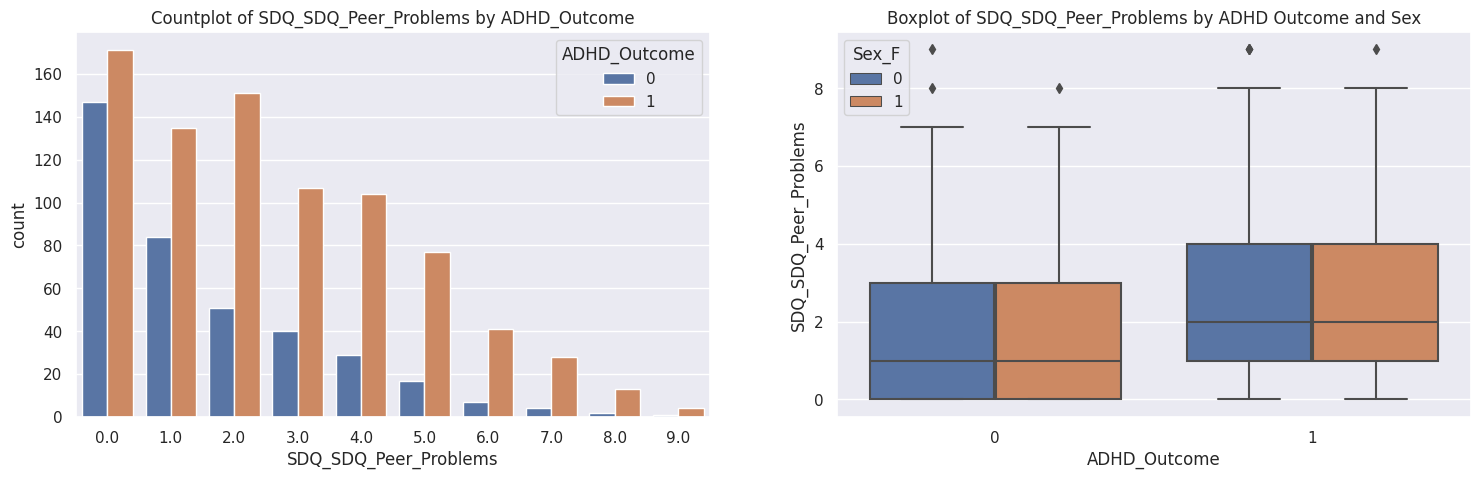

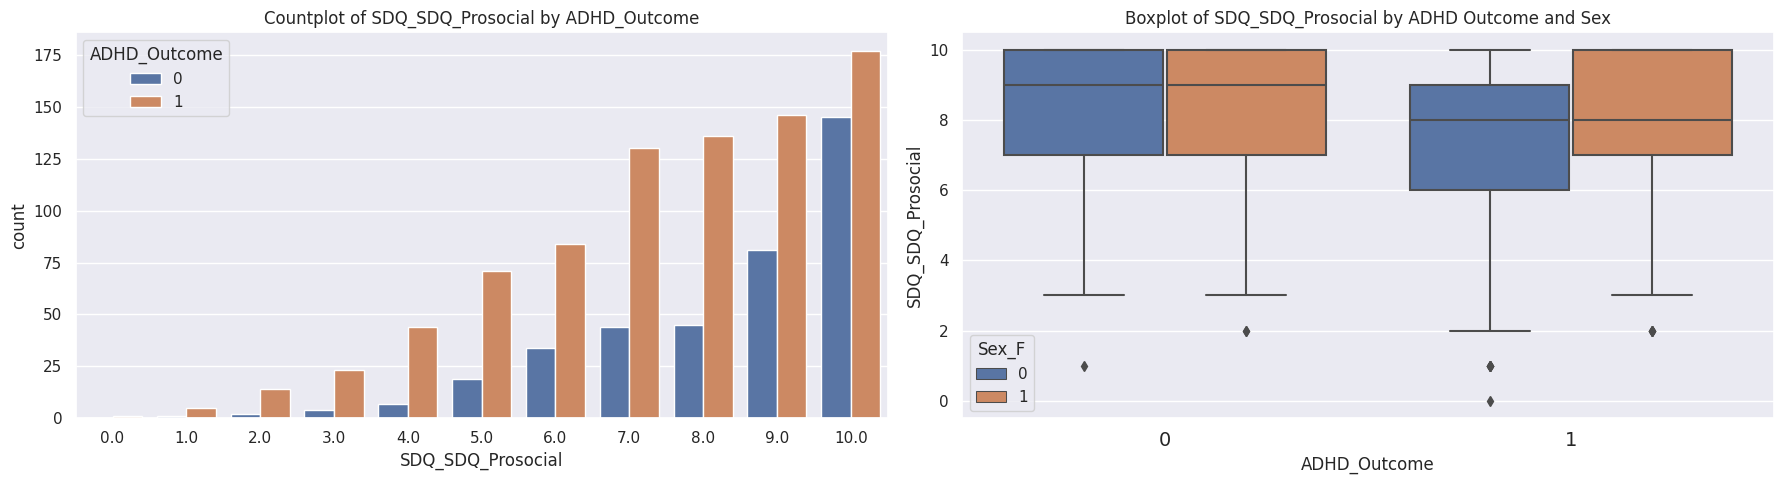

In [29]:
SDQ_cols = [col for col in df.columns if col.startswith('SDQ')]    
target_vars = ['ADHD_Outcome', 'Sex_F'] 


for i, col in enumerate(SDQ_cols):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5)) 
    sns.countplot(data=df,
                  x=col, 
                  hue=target_vars[0],
                  ax=ax1) 
    ax1.set_title(f'Countplot of {col} by {target_vars[0]}') 
    
    max_val = df[col].max() 
    if max_val >=20:
        step=5 if max_val<=50 else 10
        ax1.set_xticks(range(0, int(max_val+1), step)) 
        
    sns.boxplot(data=df,
                y = col,
                x = target_vars[0], 
                hue= target_vars[1],  
                ax=ax2)   
    ax2.set_title(f'Boxplot of {col} by ADHD Outcome and Sex') 

plt.xticks(fontsize=14)
plt.tight_layout() 
plt.show() 

 ####  3️⃣ ***Correlation with ADHD***   

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'SDQ_SDQ_Prosocial'),
  Text(1, 0, 'SDQ_SDQ_Emotional_Problems'),
  Text(2, 0, 'SDQ_SDQ_Peer_Problems'),
  Text(3, 0, 'SDQ_SDQ_Internalizing'),
  Text(4, 0, 'SDQ_SDQ_Conduct_Problems'),
  Text(5, 0, 'SDQ_SDQ_Generating_Impact'),
  Text(6, 0, 'SDQ_SDQ_Difficulties_Total'),
  Text(7, 0, 'SDQ_SDQ_Externalizing'),
  Text(8, 0, 'SDQ_SDQ_Hyperactivity')])

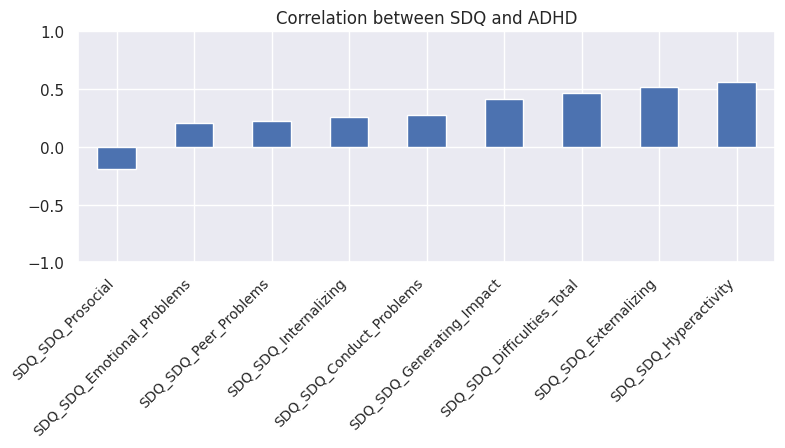

In [30]:
corr_SDQ_ADHD = df[SDQ_cols + ['ADHD_Outcome']].corr()['ADHD_Outcome'].drop('ADHD_Outcome').sort_values()  

fig = plt.figure(figsize=(9,3))
corr_SDQ_ADHD.plot(kind='bar')  

plt.title('Correlation between SDQ and ADHD')
plt.ylim(-1,1)
plt.xticks(rotation=45, 
           ha='right',
           fontsize=10)

### 📝 **Summary:**  

1. Hyperactivity has a strong correlation with ADHD. 
   
2. Externalizing has a moderate correlation with ADHD. 

### 🔍 **2. Alabama Parenting Questionnaire (APQ)**  

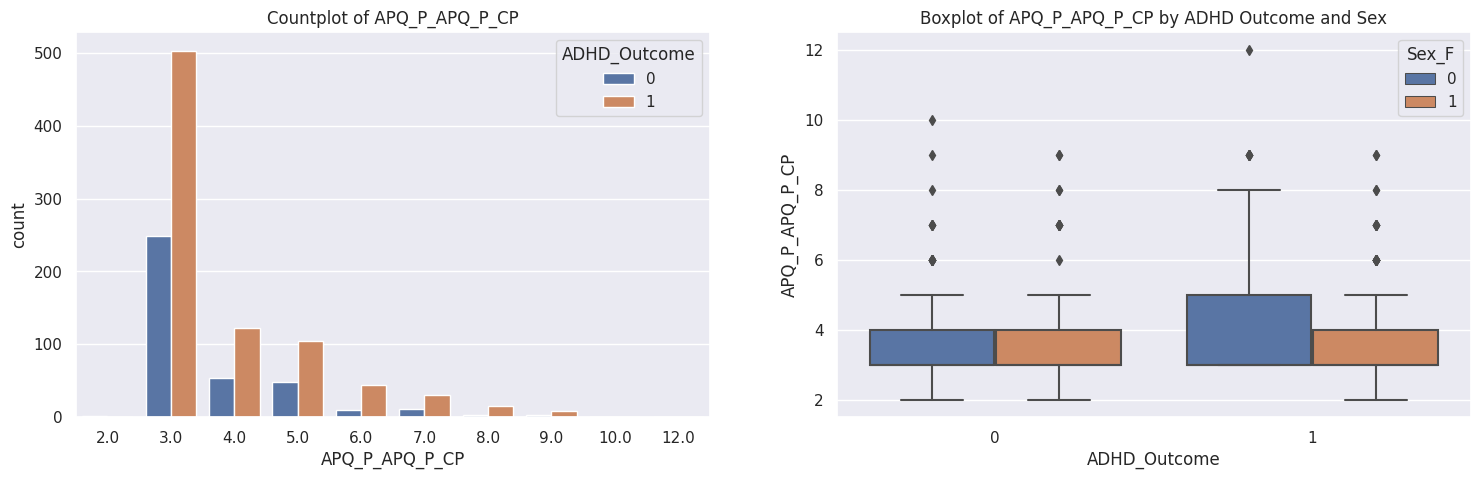

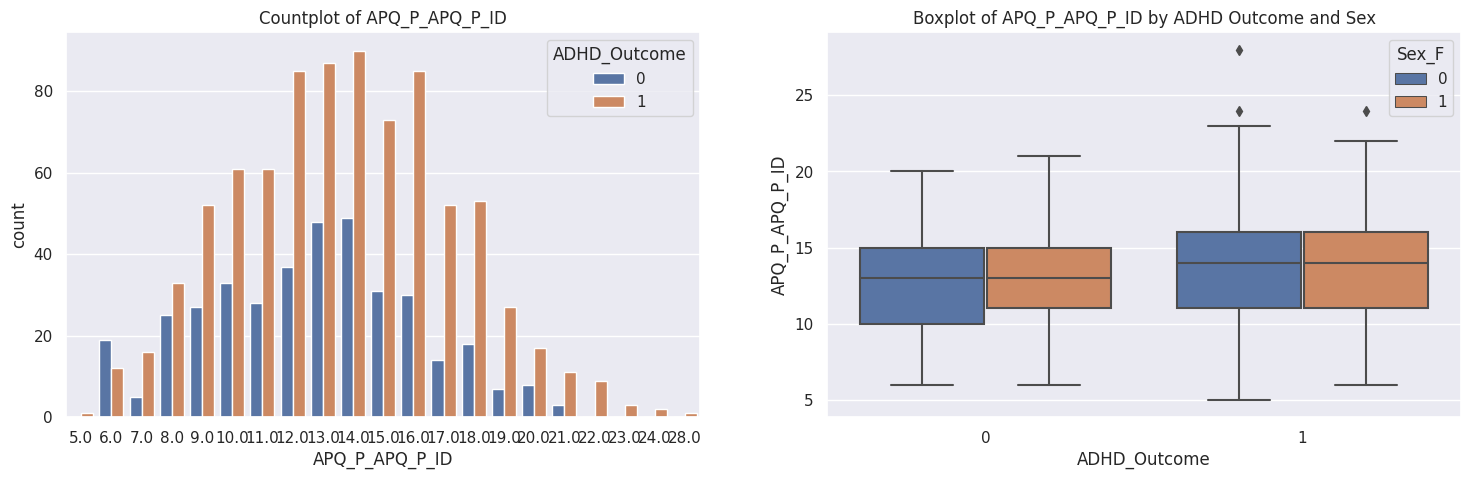

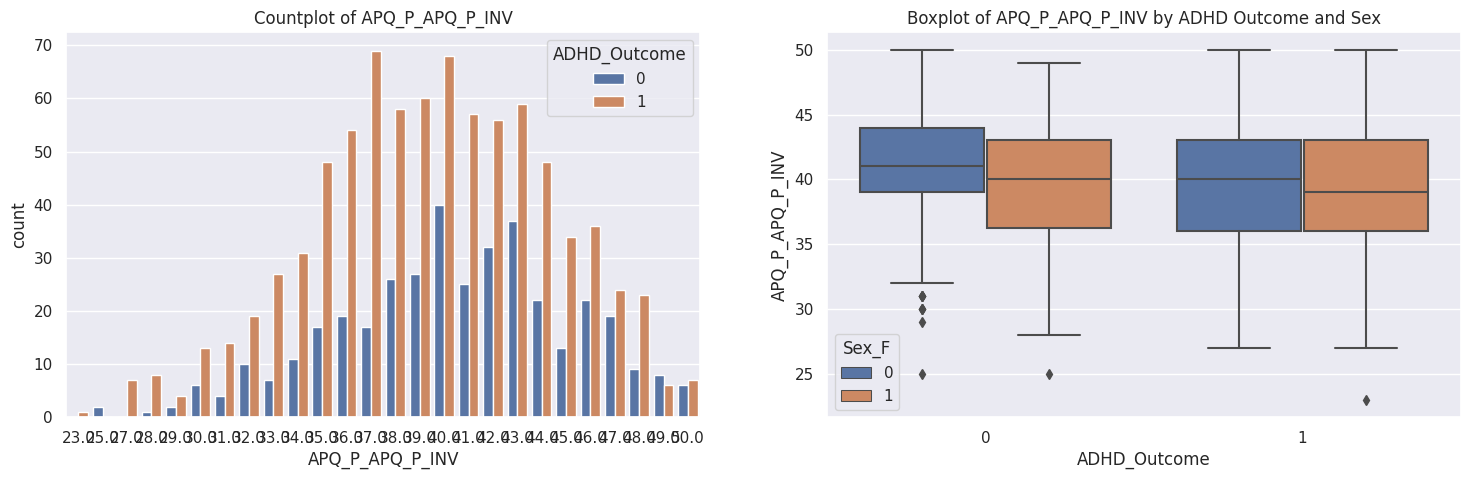

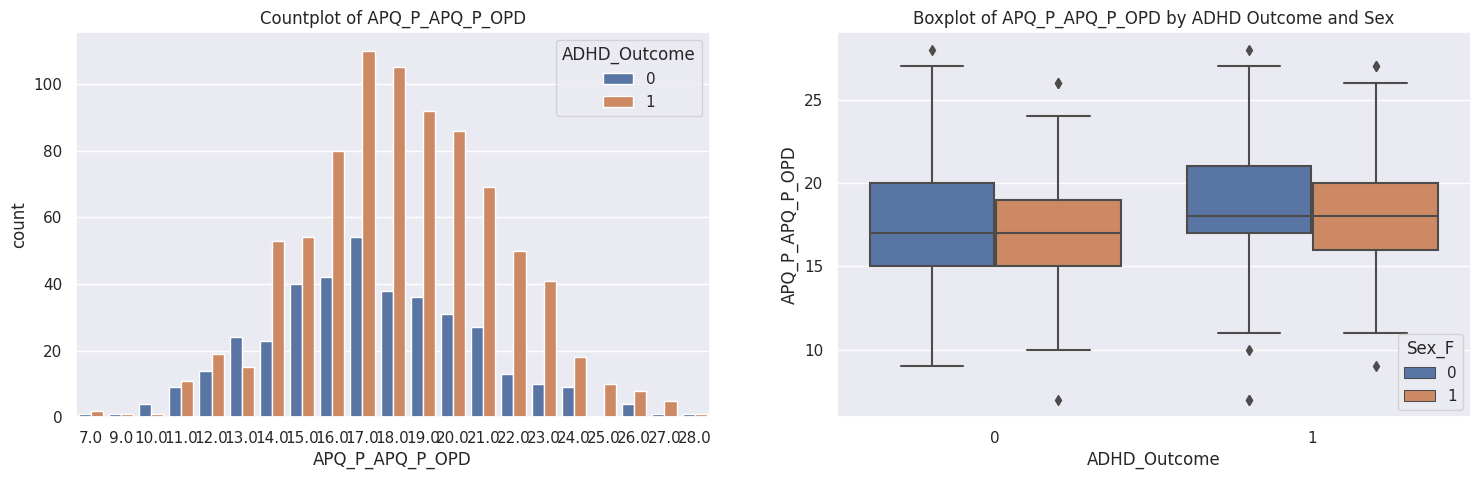

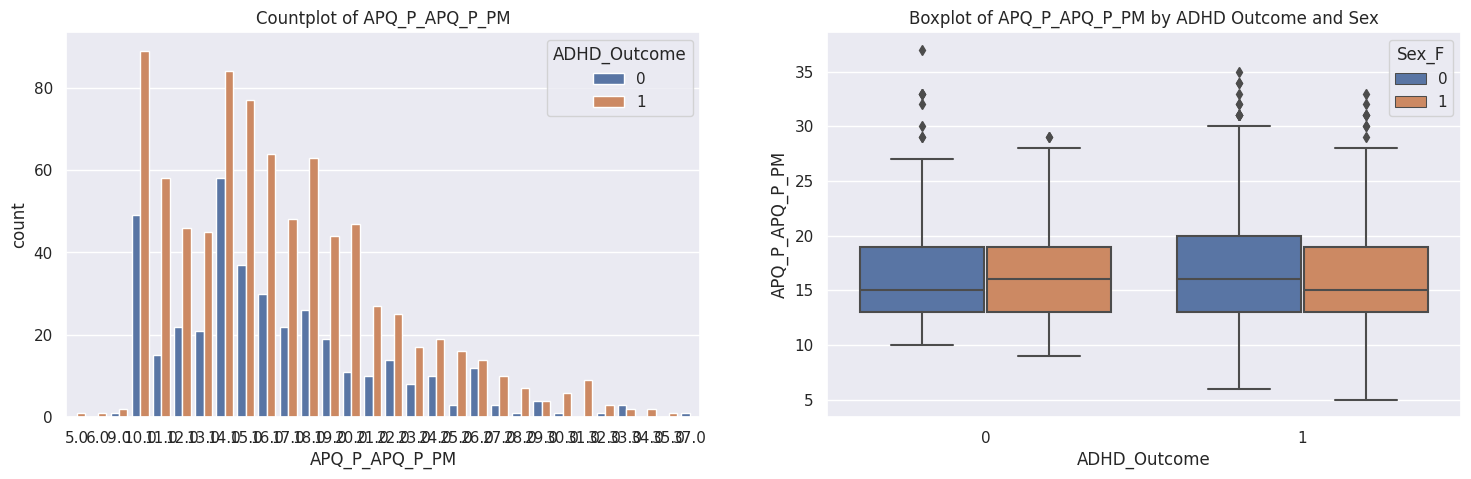

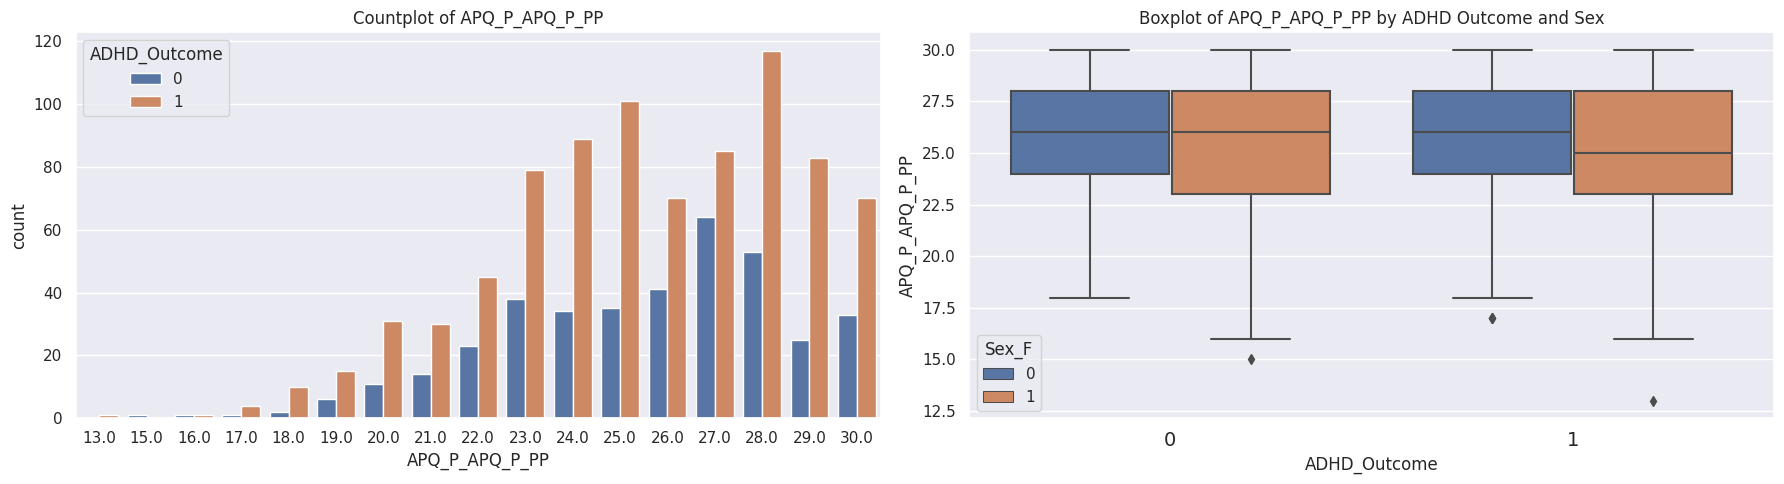

In [31]:
APQ_cols = [col for col in df.columns if col.startswith('APQ')]  
target_vars = ['ADHD_Outcome', 'Sex_F'] 


for i, col in enumerate(APQ_cols): 
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5)) 
    
    sns.countplot(data=df,
                  x=col, 
                  hue=target_vars[0],
                  ax=ax1) 
    ax1.set_title(f'Countplot of {col}')
        
        
    sns.boxplot(data=df, 
                y = col,
                x = target_vars[0],  
                hue= target_vars[1],   
                ax=ax2)    
    ax2.set_title(f'Boxplot of {col} by ADHD Outcome and Sex') 

plt.xticks(fontsize=14)
plt.tight_layout() 
plt.show()  

####  3️⃣ ***Correlation between ADHD & ADHD***   

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'APQ_P_APQ_P_INV'),
  Text(1, 0, 'APQ_P_APQ_P_PP'),
  Text(2, 0, 'APQ_P_APQ_P_PM'),
  Text(3, 0, 'APQ_P_APQ_P_CP'),
  Text(4, 0, 'APQ_P_APQ_P_ID'),
  Text(5, 0, 'APQ_P_APQ_P_OPD')])

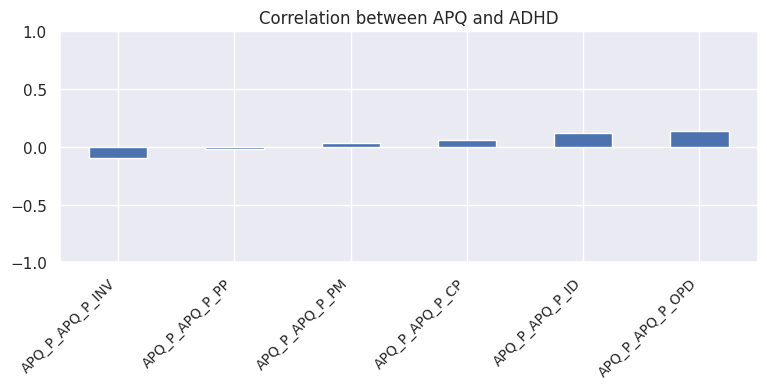

In [32]:
corr_apq = df[APQ_cols+['ADHD_Outcome']].corr()['ADHD_Outcome'].drop('ADHD_Outcome').sort_values() 
plt.figure(figsize=(9,3))
corr_apq.plot(kind='bar') 


plt.title('Correlation between APQ and ADHD')
plt.ylim(-1,1)
plt.xticks(rotation=45, 
           ha='right',
           fontsize=10) 


### 📝 **Summary:**   

1. ...
2. ...
3. 

### 🔍 **3. Clinical Measurements**   

**1.Edinburgh Handedness Questionnaire**

**2.Ishihara Color Test**

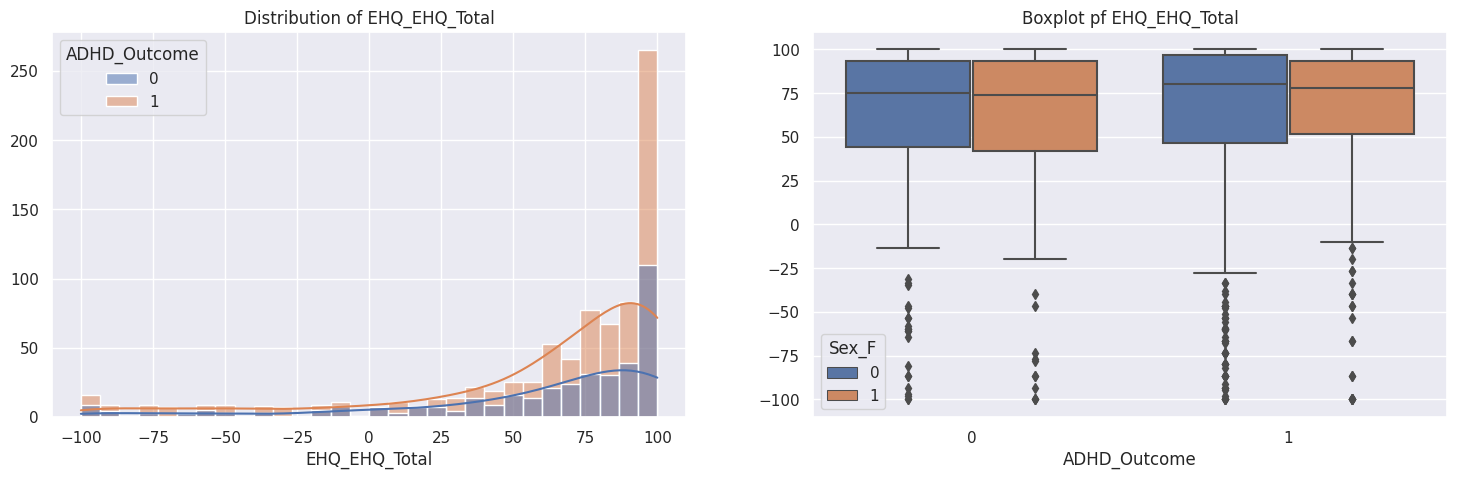

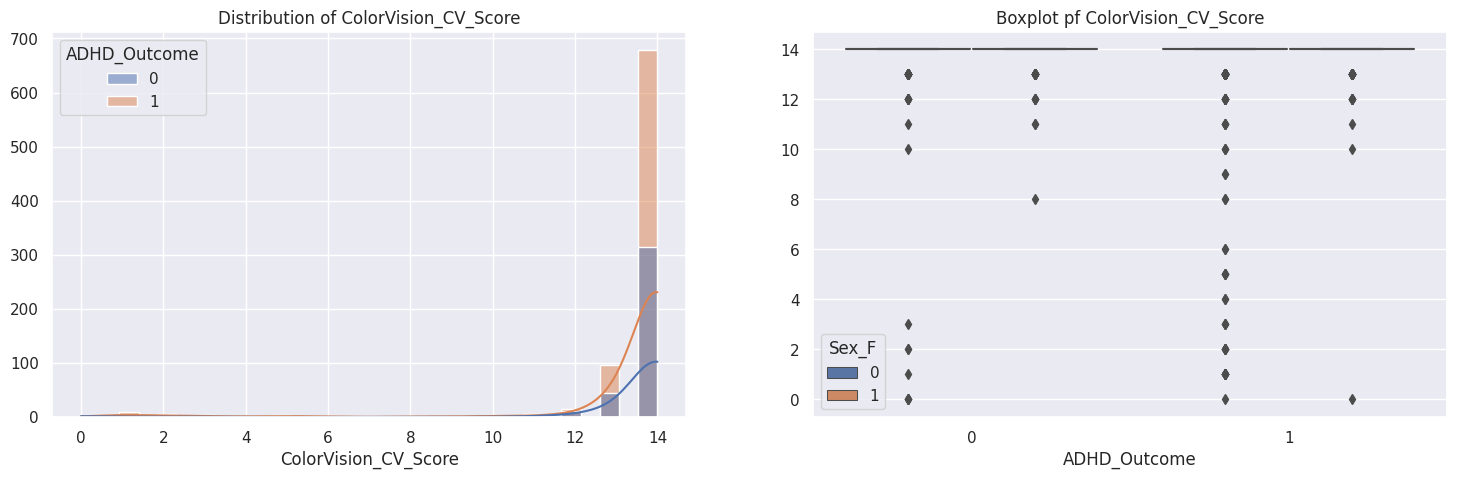

In [33]:
clinical_cols = ['EHQ_EHQ_Total', 'ColorVision_CV_Score'] 

for i, col in enumerate(clinical_cols):
    fig, (ax1, ax2) = plt.subplots(1, 2, 
                                   figsize=(18, 5)) 
    sns.histplot(data = df,
             x = col, 
             bins=30,
             kde=True,
             hue='ADHD_Outcome', 
             ax = ax1) 
    ax1.set_title(f'Distribution of {col}')  
    ax1.set_ylabel('')


    sns.boxplot(data=df,
                x='ADHD_Outcome', 
                y=col,
                hue='Sex_F', 
                ax=ax2)   

    ax2.set_title(f'Boxplot pf {col}')  
    ax2.set_ylabel('')


plt.show() 

### 🧠 **Understand Functional Connectome Matrices:** 

In [34]:
import os
os.listdir('/kaggle/input/functional-matrices')  

['TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv']

In [35]:
df_fcm = pd.read_csv('/kaggle/input/functional-matrices/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv') 

### 🔍 **1. Shape of the DataFrame**

In [36]:
df_fcm.shape

(1213, 19901)

### 🔍 **2. Take a glimpse of Data:**

In [37]:
df_fcm.head(10)

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.222930,0.527903,0.429966,0.060457,0.566489,0.315342,0.508408,-0.078290,0.525692,...,0.224985,0.397448,0.422966,0.184642,0.305549,0.420349,0.016328,0.561864,0.471170,0.365221
1,WHWymJu6zNZi,0.614765,0.577255,0.496127,0.496606,0.404686,0.439724,0.122590,-0.085452,0.120673,...,0.217546,-0.014549,0.000440,-0.096451,0.454501,0.343916,0.167313,0.607656,0.550623,0.503176
2,4PAQp1M6EyAo,-0.116833,0.458408,0.260703,0.639031,0.769337,0.442528,0.637110,0.192010,0.520379,...,0.342487,-0.021141,-0.037836,0.075069,0.412712,0.292708,0.391005,0.461544,0.508912,0.624232
3,obEacy4Of68I,0.199688,0.752714,0.658283,0.575096,0.692867,0.645789,0.522750,0.412188,0.530843,...,0.103562,-0.178313,0.210983,-0.018666,0.436313,0.592982,0.216205,0.341272,0.440313,0.558193
4,s7WzzDcmDOhF,0.227321,0.613268,0.621447,0.562673,0.736709,0.589813,0.266676,0.359668,0.300771,...,-0.164956,0.007064,-0.120904,-0.488095,0.493575,-0.215361,0.210685,0.055850,0.119065,0.108273
5,s55ZRHrJtnlL,0.337316,0.823123,0.733585,0.418883,0.771445,0.653699,0.693189,0.345408,0.729822,...,0.119869,0.047217,0.139147,0.187316,0.534683,0.175817,0.291163,0.569374,0.737414,0.716293
6,sId1cQF5F22m,0.205613,0.514554,0.580002,0.356749,0.355509,0.402521,0.503667,-0.090709,0.442115,...,-0.068885,-0.288361,-0.259806,-0.072032,0.395912,0.340496,0.217748,0.408298,0.174187,0.659205
7,T4CaImRntWnB,-0.190693,0.311654,0.309758,0.466017,0.461799,0.348240,0.258351,0.267011,0.204740,...,0.011235,0.172349,0.099238,0.324650,0.266663,0.262601,0.096195,0.497883,0.617897,0.555232
8,a5JFxSZjVg5i,0.243401,0.274912,0.364787,0.252179,0.645695,0.677565,0.480189,0.400882,0.407494,...,-0.057347,-0.161009,-0.156577,-0.081074,0.767887,0.607772,0.241883,0.708180,0.247329,0.452594
9,VZnIq2hRErI5,0.182886,0.734523,0.286137,0.300662,0.542568,0.707586,0.646182,0.263905,0.554053,...,0.032387,0.407388,0.328920,0.364869,0.569350,0.266910,0.458811,0.567601,0.723238,0.547051


### 🔍 **3. Check Missing Values:**

In [38]:
df_fcm.isnull().sum().sum() 

0

### 🔍 **4. Reconstruct the connection matrix & Visualize Connectivity Matrix of a Sample**

Text(0.5, 1.0, 'Brain Functional Connectivity Matrix')

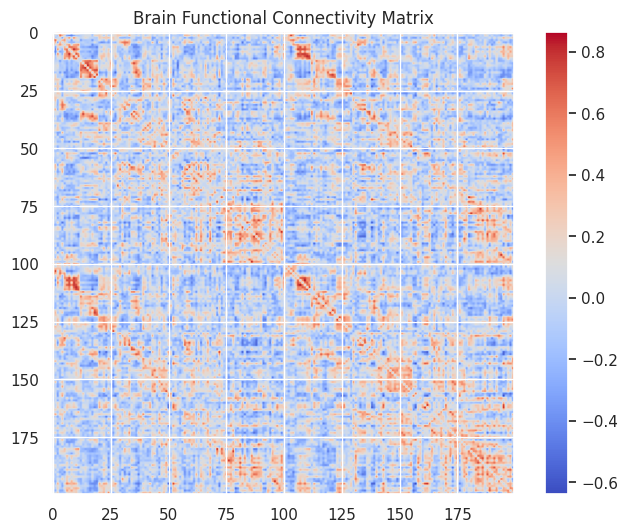

In [39]:
def reconstruct_matrix(row, num_regions=200):
    
    matrix = np.zeros((num_regions, num_regions)) 
    connectome_cols = [col for col in row.index if 'throw' in col] 
    connectome_values = row[connectome_cols].values 

    index = 0 
    for i in range(num_regions):
        for j in range(i+1, num_regions):
            matrix[i,j] = connectome_values[index] 
            matrix[j,i] = connectome_values[index] 
            index+=1  
    return matrix

sample_matrix = reconstruct_matrix(df_fcm.iloc[0]) 

plt.figure(figsize=(8,6))
plt.imshow(sample_matrix,
          cmap='coolwarm') 
plt.colorbar() 
plt.title('Brain Functional Connectivity Matrix') 